# Basic Models

#### Pre-Loads

In [ ]:
! pip install imblearn
! pip install xgboost
! pip install lightgbm

In [ ]:
! mkdir -p dataset/csvs/
! mkdir -p plots/

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
import sys

import numpy as np
import pandas as pd
import joblib

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#### Load Feature DataFrames

In [ ]:
organic_df = pd.read_csv("drive/MyDrive/chills_dataset/processed/features/organic_chills_features.csv", index_col=0)
augmented_df = pd.read_csv("drive/MyDrive/chills_dataset/processed/features/augmented_chills_features.csv", index_col=0)
simulated_df = pd.read_csv("drive/MyDrive/chills_dataset/processed/features/simulated_chills_features.csv", index_col=0)
non_chills_df = pd.read_csv("drive/MyDrive/chills_dataset/processed/features/non_chills_features.csv", index_col=0)
frisson_events = joblib.load("drive/MyDrive/chills_dataset/processed/frisson_events.sav")

In [ ]:
# organic_df.loc[organic_df["prior"]=="offset", "offset"] += 20
# augmented_df.loc[augmented_df["prior"]=="offset", "offset"] += 20
# simulated_df.loc[simulated_df["prior"]=="offset", "offset"] += 20

In [ ]:
# pd.set_option('display.max_columns', None)
organic_df_6s = organic_df[(organic_df["offset"]==-6) & (organic_df["prior"]=="onset")]
augmented_df_6s = augmented_df[(augmented_df["offset"]==-6) & (augmented_df["prior"]=="onset")]
simulated_df_6s = simulated_df[(simulated_df["offset"]==-6) & (simulated_df["prior"]=="onset")]

#### View N(Events) Per Subject

*Hold out subject 5060 During Training, Observe From authetic Chills Per Subject Lot Below*

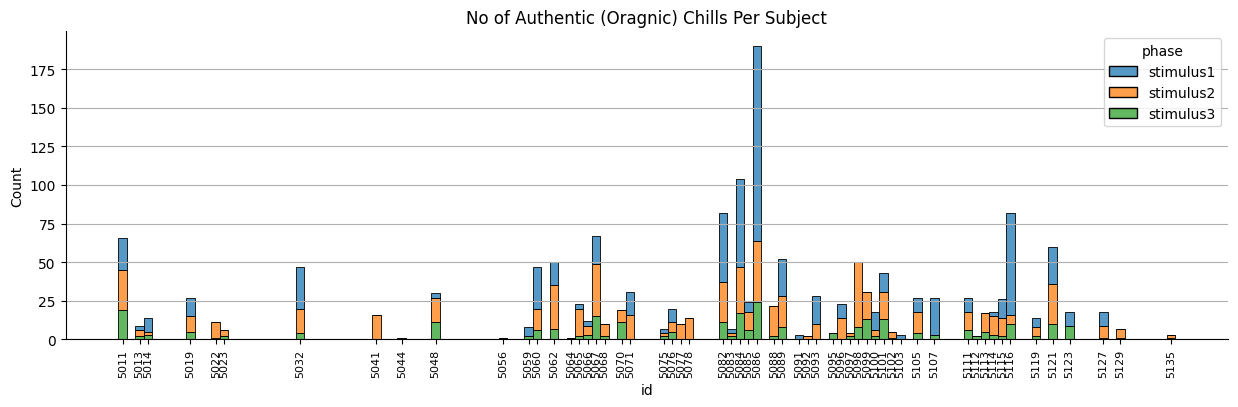

In [ ]:
ids = organic_df_6s["id"].unique()

plt.figure(figsize=(15,4))
sns.histplot(organic_df_6s, x="id", hue="phase", multiple="stack",
             stat="count", discrete=True, binwidth=0.8)

plt.xticks(ids, rotation=90, fontsize=8)
plt.title("No of Authentic (Oragnic) Chills Per Subject")
plt.grid(axis="y")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.savefig("plots/no_organic_chills.png", dpi=300, bbox_inches="tight")
plt.show()

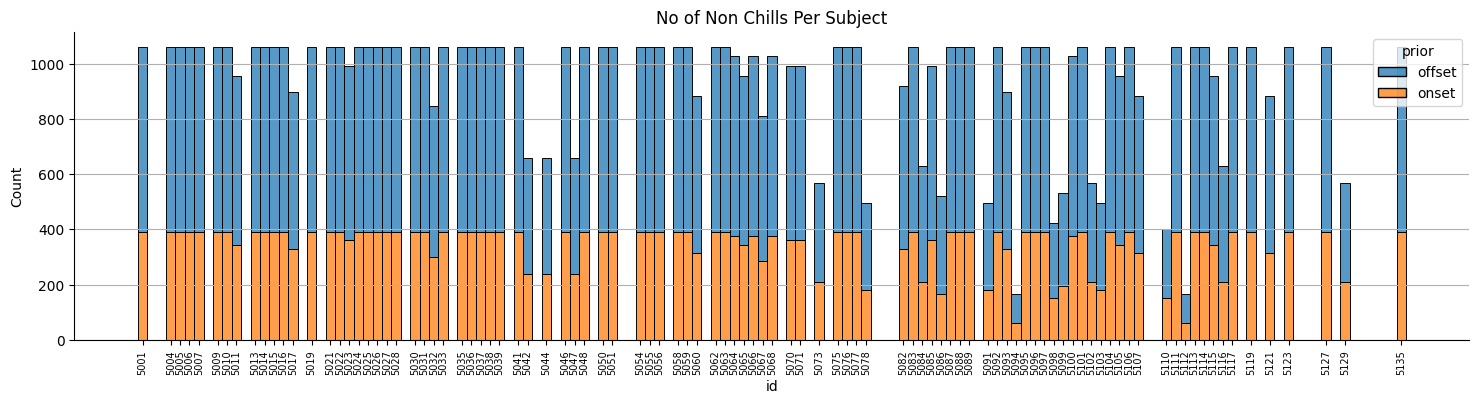

In [ ]:
ids = non_chills_df["id"].unique()

plt.figure(figsize=(18,4))
sns.histplot(non_chills_df, x="id", hue="prior", multiple="stack",
             stat="count", discrete=True, binwidth=0.8)

plt.xticks(ids, rotation=90, fontsize=7)
plt.title("No of Non Chills Per Subject")
plt.grid(axis="y")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.show()

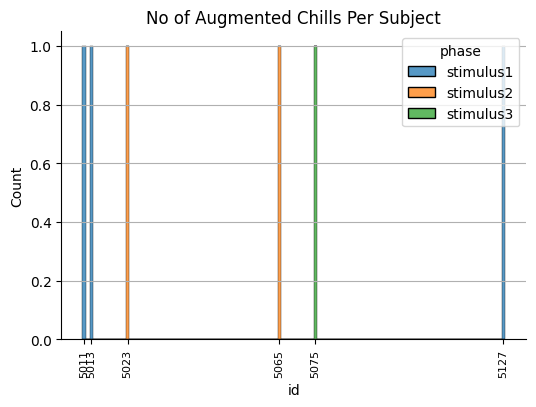

In [ ]:
ids = augmented_df_6s["id"].unique()

plt.figure(figsize=(6,4))
sns.histplot(augmented_df_6s, x="id", hue="phase", multiple="stack",
             stat="count", discrete=True, binwidth=0.8)

plt.xticks(ids, rotation=90, fontsize=8)
plt.title("No of Augmented Chills Per Subject")
plt.grid(axis="y")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.savefig("plots/no_augmented_chills.png", dpi=300, bbox_inches="tight")
plt.show()

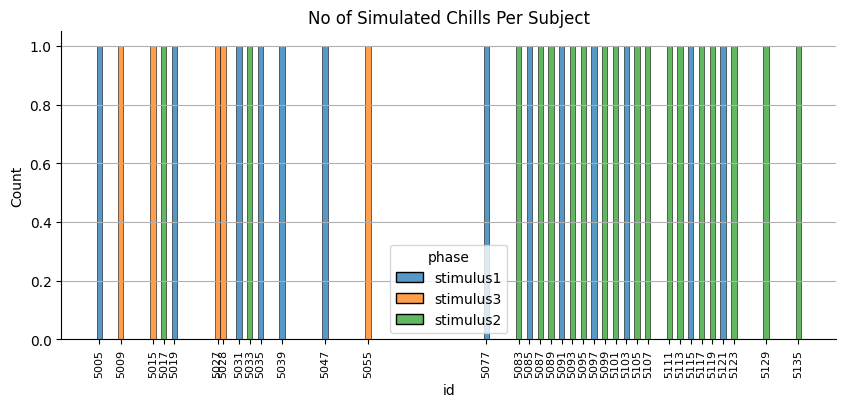

In [ ]:
ids = simulated_df_6s["id"].unique()

plt.figure(figsize=(10,4))
sns.histplot(simulated_df_6s, x="id", hue="phase", multiple="stack",
             stat="count", discrete=True, binwidth=0.8)

plt.xticks(ids, rotation=90, fontsize=8)
plt.title("No of Simulated Chills Per Subject")
plt.grid(axis="y")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.savefig("plots/no_simulated_chills.png", dpi=300, bbox_inches="tight")
plt.show()

### Data Preparation

#### Data Cleaning

In [ ]:
dataset = pd.concat([organic_df_6s, augmented_df_6s, simulated_df_6s, non_chills_df])
# dataset = pd.concat([organic_df, augmented_df, simulated_df, non_chills_df])
dataset.head()

,id,phase,epoch,prior,chill,offset,mean_HR,HRV,mean_NN,std_NN,median_NN,HR_RMSSD,HRV_LF,HRV_HF,HRV_FF,SD1,SD2,SD1/SD2,ellipse_area,ECG_SampEn,mean_RR,SDBB,RR_RMSSD,SDSD,RRV_LF,RRV_HF,RRV_FF,CRC_coherence,CRC_phase_sync,EDA_SCL,EDA_mean,EDA_median,EDA_std,EDA_skew,EDA_kurtosis,phasic_amplitude_mean,phasic_amplitudes_std,phasic_risetime_mean,phasic_risetime_std,phasic_recovery_mean,phasic_recovery_std,phasic_domnt_freq
14,5011,stimulus1,0,onset,ORGANIC,-6,71.403384,1.484258,0.840652,0.018489,0.845309,0.028439,0.0,0.000013,0.000049,0.019658,0.017241,1.140208,0.001065,0.729158,24.396541,0.0,NaN,NaN,0.0,0.000000,0.003147,NaN,0.935878,0.569000,0.858513,0.867686,0.035322,-6.808669,70.924121,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
50,5011,stimulus1,1,onset,ORGANIC,-6,75.188987,2.893389,0.799202,0.034540,0.794411,0.028351,0.0,0.000000,0.000149,0.011264,0.047530,0.236977,0.001682,0.786741,19.374725,0.0,NaN,NaN,0.0,0.000000,0.001472,NaN,0.968760,0.390496,0.588760,0.595733,0.023921,-7.454692,78.700646,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
86,5011,stimulus1,2,onset,ORGANIC,-6,71.955073,2.349970,0.834731,0.029427,0.840319,0.036655,0.0,0.000000,0.001066,0.025373,0.032987,0.769185,0.002629,0.710496,17.260228,0.0,NaN,NaN,0.0,0.001984,0.004265,NaN,0.952995,0.374003,0.566017,0.568600,0.020700,-10.566438,129.275523,0.538210,0.0,0.149701,0.0,0.359281,0.0,0.165347
122,5011,stimulus1,3,onset,ORGANIC,-6,80.983559,2.375015,0.741517,0.023070,0.745509,0.031102,0.0,0.000000,0.000354,0.021524,0.024518,0.877864,0.001658,0.989752,13.876017,0.0,NaN,NaN,0.0,0.000000,0.008698,NaN,0.917081,0.287207,0.436155,0.438134,0.017043,-9.405174,109.695037,0.403107,0.0,0.149701,0.0,0.359281,0.0,0.165347
158,5011,stimulus1,4,onset,ORGANIC,-6,76.650316,2.197098,0.783433,0.024790,0.781437,0.026794,0.0,0.000000,0.001577,0.017346,0.030466,0.569340,0.001660,0.912078,12.739042,0.0,NaN,NaN,0.0,0.002813,0.006679,NaN,0.947192,0.288680,0.438737,0.440456,0.016582,-9.705109,112.372360,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000


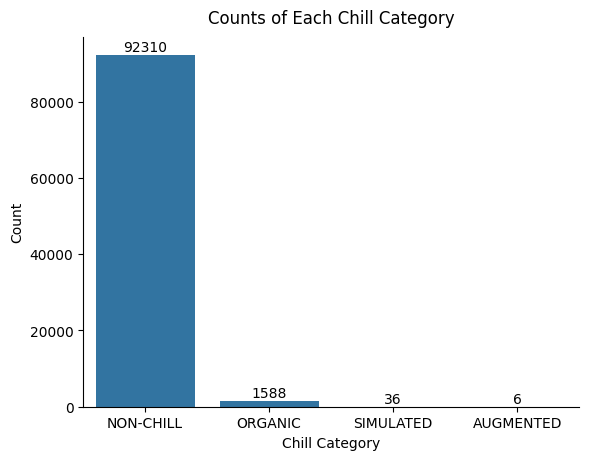

In [ ]:
# Assuming 'dataset["chill"]' is your categorical column
value_counts = dataset["chill"].value_counts()

# Create the barplot
ax = sns.barplot(x=value_counts.index, y=value_counts.values)

# Annotate each bar with the count
for i, val in enumerate(value_counts.values):
    ax.text(i, val + 0.1, str(val), ha='center', va='bottom')

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.xlabel("Chill Category")
plt.ylabel("Count")
plt.title("Counts of Each Chill Category", y=1.015)
plt.savefig("plots/class_counts.png", dpi=300, bbox_inches="tight")
plt.show()
# dataset["chill"].value_counts()

In [ ]:
dataset.replace([np.inf, -np.inf], 0, inplace=True)
N_SAMPLES =  dataset.shape[0]

NAN_VALS_DF = dataset.isna().sum()
EXTREME_NANS = NAN_VALS_DF[NAN_VALS_DF>int(0.3*N_SAMPLES)]
print(EXTREME_NANS/N_SAMPLES)
print(f"Total % of Missing Values in Dataset: {(EXTREME_NANS/(dataset.shape[0]*dataset.shape[1])).sum():.2f}%")
print(" ")
print(f"Dataset Size: {dataset.shape}")
NAN_VALS_DF = dataset.isna().sum()
print(f"NO NAN VALS/DATASET_SIZE: {NAN_VALS_DF.sum()}/{dataset.shape[0]*dataset.shape[1]} = {NAN_VALS_DF.sum()/(dataset.shape[0]*dataset.shape[1]):.2f}%")

RR_RMSSD         0.808388
SDSD             0.808388
CRC_coherence    1.000000
dtype: float64
Total % of Missing Values in Dataset: 0.06%
 
Dataset Size: (93940, 42)
NO NAN VALS/DATASET_SIZE: 519409/3945480 = 0.13%


In [ ]:
pd.set_option("display.max_columns", None)
dataset.describe()

,id,epoch,offset,mean_HR,HRV,mean_NN,std_NN,median_NN,HR_RMSSD,HRV_LF,HRV_HF,HRV_FF,SD1,SD2,SD1/SD2,ellipse_area,ECG_SampEn,mean_RR,SDBB,RR_RMSSD,SDSD,RRV_LF,RRV_HF,RRV_FF,CRC_coherence,CRC_phase_sync,EDA_SCL,EDA_mean,EDA_median,EDA_std,EDA_skew,EDA_kurtosis,phasic_amplitude_mean,phasic_amplitudes_std,phasic_risetime_mean,phasic_risetime_std,phasic_recovery_mean,phasic_recovery_std,phasic_domnt_freq
count,93940.000000,93940.000000,93940.000000,71295.000000,71295.000000,76917.000000,76917.000000,76917.000000,73892.000000,82327.0,82327.000000,82327.000000,73892.000000,71969.000000,7.194600e+04,71969.000000,93940.000000,93940.000000,74647.000000,18000.000000,18000.000000,93931.0,93931.000000,93931.000000,0.0,76901.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000
mean,5062.446615,2.373909,1.466468,65.740277,4.351107,1.024570,0.089173,1.015866,0.148899,0.0,0.000160,0.000781,0.069064,0.098245,8.491586e+02,0.056777,0.561838,18.875977,0.129821,1.051738,0.169573,0.0,0.002715,0.013787,NaN,0.911252,0.391263,0.595571,0.597331,0.027168,-7.614714,91.974852,0.020105,0.000806,0.026797,0.012624,0.026554,0.001955,0.010090
std,36.842019,1.779232,12.291363,10.574381,7.269819,0.428514,0.192256,0.426706,0.363579,0.0,0.001831,0.004615,0.154946,0.240590,1.608651e+05,0.265478,0.203600,4.803246,0.337978,1.003037,0.488023,0.0,0.038117,0.253916,NaN,0.061528,0.196233,0.297510,0.298736,0.016513,4.237235,56.598252,0.106588,0.010698,0.178358,0.113243,0.123010,0.025363,0.041080
min,5001.000000,0.000000,-20.000000,32.267468,0.000000,0.378000,0.000000,0.378000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.010586,7.502536,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,0.522663,0.000349,0.000505,0.000021,0.000301,-12.639775,-1.946834,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5030.000000,1.000000,-10.000000,58.096121,0.920340,0.830007,0.013492,0.826000,0.018767,0.0,0.000000,0.000029,0.009980,0.014420,5.080120e-01,0.000441,0.435238,14.384567,0.000000,0.299401,0.000000,0.0,0.000000,0.002094,NaN,0.881411,0.227339,0.347273,0.349156,0.019165,-11.217156,34.211440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5062.000000,2.000000,4.000000,64.894953,1.653841,0.946000,0.024642,0.944000,0.033956,0.0,0.000000,0.000134,0.020301,0.026660,7.960565e-01,0.001484,0.543811,18.331841,0.000000,0.718563,0.000000,0.0,0.000000,0.005243,NaN,0.926673,0.429930,0.654596,0.656756,0.027344,-9.607105,115.558302,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5095.000000,4.000000,12.000000,73.405716,3.253566,1.064671,0.051994,1.056000,0.070530,0.0,0.000061,0.000441,0.040387,0.058408,1.204247e+00,0.005433,0.665017,23.480188,0.000000,1.556886,0.000000,0.0,0.001447,0.012141,NaN,0.955797,0.567928,0.863590,0.866277,0.032791,-3.883327,141.146723,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5135.000000,41.000000,20.000000,111.906408,56.968263,5.552000,2.160679,5.552000,4.321357,0.0,0.332940,0.721293,2.228801,3.055661,3.051078e+07,9.151585,2.322388,30.273527,2.485030,4.970060,3.952096,0.0,6.493910,40.827440,NaN,0.999123,0.656892,0.998081,0.999996,0.432175,5.200292,171.289859,0.956699,0.348931,3.000000,1.425000,3.083832,1.616766,0.666667


In [ ]:
# dataset = dataset.drop(["CRC_coherence", "RR_RMSSD", "SDSD", "HRV_LF", "RRV_LF"],
#                        axis=1)
dataset = dataset.drop(["CRC_coherence", "RR_RMSSD", "SDSD", "HRV_LF", "RRV_LF"],
                       axis=1)

numerical_cols = fois = dataset.select_dtypes(include=["number"]).columns.drop(['id', 'epoch', 'offset'])   # --> Fearures of Interest / Predictor Vriables
labels = dataset["chill"].unique()
print(labels)

for label in labels:
  mask = dataset["chill"] == label
  # dataset.loc[mask, numerical_cols] = dataset.loc[mask, numerical_cols].fillna(0)
  dataset.loc[mask, numerical_cols] = dataset.loc[mask, numerical_cols].fillna(dataset.loc[mask, numerical_cols].mean())
  # dataset = dataset.drop(index=dataset[mask & dataset[numerical_cols].isnull().any(axis=1)].index)

['ORGANIC' 'AUGMENTED' 'SIMULATED' 'NON-CHILL']


In [ ]:
NAN_VALS_DF = dataset.isna().sum()
EXTREME_NANS = NAN_VALS_DF[NAN_VALS_DF>int(0.1*N_SAMPLES)]
print(EXTREME_NANS/(dataset.shape[0]*dataset.shape[1]))
print(f"Total %: {(EXTREME_NANS/(dataset.shape[0]*dataset.shape[1])).sum():.2f}%")
print(" ")
print(f"Dataset Size: {dataset.shape}")
NAN_VALS_DF = dataset.isna().sum()
print(f"NO NAN VALS/DATASET_SIZE: {NAN_VALS_DF.sum()}/{dataset.shape[0]*dataset.shape[1]} = {NAN_VALS_DF.sum()/(dataset.shape[0]*dataset.shape[1]):.2f}%")

Series([], dtype: float64)
Total %: 0.00%
 
Dataset Size: (93940, 37)
NO NAN VALS/DATASET_SIZE: 0/3475780 = 0.00%


In [ ]:
pd.set_option("display.max_columns", None)
dataset.describe()

,id,epoch,offset,mean_HR,HRV,mean_NN,std_NN,median_NN,HR_RMSSD,HRV_HF,HRV_FF,SD1,SD2,SD1/SD2,ellipse_area,ECG_SampEn,mean_RR,SDBB,RRV_HF,RRV_FF,CRC_phase_sync,EDA_SCL,EDA_mean,EDA_median,EDA_std,EDA_skew,EDA_kurtosis,phasic_amplitude_mean,phasic_amplitudes_std,phasic_risetime_mean,phasic_risetime_std,phasic_recovery_mean,phasic_recovery_std,phasic_domnt_freq
count,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,9.394000e+04,93940.000000,93940.000000,93940.000000,9.394000e+04,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000
mean,5062.446615,2.373909,1.466468,65.739338,4.351918,1.024565,0.089191,1.015862,0.148930,1.601331e-04,0.000781,0.069075,0.098263,8.296196e+02,0.056785,0.561838,18.875977,0.129812,0.002715,0.013787,0.911248,0.391263,0.595571,0.597331,0.027168,-7.614714,91.974852,0.020105,0.000806,0.026797,0.012624,0.026554,0.001955,0.010090
std,36.842019,1.779232,12.291363,9.212273,6.333455,0.387751,0.173970,0.386115,0.322465,1.714069e-03,0.004320,0.137424,0.210587,1.407859e+05,0.232369,0.203600,4.803246,0.301282,0.038115,0.253904,0.055670,0.196233,0.297510,0.298736,0.016513,4.237235,56.598252,0.106588,0.010698,0.178358,0.113243,0.123010,0.025363,0.041080
min,5001.000000,0.000000,-20.000000,32.267468,0.000000,0.378000,0.000000,0.378000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.010586,7.502536,0.000000,0.000000,0.000000,0.522663,0.000349,0.000505,0.000021,0.000301,-12.639775,-1.946834,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5030.000000,1.000000,-10.000000,60.455369,1.129385,0.855200,0.015811,0.850000,0.022565,0.000000e+00,0.000039,0.012687,0.017677,6.018395e-01,0.000678,0.435238,14.384567,0.000000,0.000000,0.002095,0.893965,0.227339,0.347273,0.349156,0.019165,-11.217156,34.211440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5062.000000,2.000000,4.000000,65.722797,2.396659,0.988423,0.032012,0.986000,0.046504,4.692248e-07,0.000188,0.027826,0.040302,1.006208e+00,0.002956,0.543811,18.331841,0.000000,0.000000,0.005244,0.911159,0.429930,0.654596,0.656756,0.027344,-9.607105,115.558302,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5095.000000,4.000000,12.000000,70.708111,4.366425,1.032525,0.089430,1.025948,0.149336,1.572319e-04,0.000787,0.069220,0.098561,3.163863e+00,0.057004,0.665017,23.480188,0.130076,0.001449,0.012143,0.950392,0.567928,0.863590,0.866277,0.032791,-3.883327,141.146723,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5135.000000,41.000000,20.000000,111.906408,56.968263,5.552000,2.160679,5.552000,4.321357,3.329397e-01,0.721293,2.228801,3.055661,3.051078e+07,9.151585,2.322388,30.273527,2.485030,6.493910,40.827440,0.999123,0.656892,0.998081,0.999996,0.432175,5.200292,171.289859,0.956699,0.348931,3.000000,1.425000,3.083832,1.616766,0.666667


#### Quick EDA Based On Preliminary EDA

In [ ]:
dataset["chill"].value_counts()

,count
chill,
NON-CHILL,92310
ORGANIC,1588
SIMULATED,36
AUGMENTED,6


In [ ]:
orig_dataset = dataset.copy()
dataset.loc[dataset["chill"]=="ORGANIC", "chill"] = "CHILL"
dataset.loc[dataset["chill"]=="AUGMENTED", "chill"] = "CHILL"
dataset.loc[dataset["chill"]=="SIMULATED", "chill"] = "NON-CHILL"
dataset["chill"].value_counts()

,count
chill,
NON-CHILL,92346
CHILL,1594


In [ ]:
pd.set_option('display.max_columns', None)
dataset.head()

,id,phase,epoch,prior,chill,offset,mean_HR,HRV,mean_NN,std_NN,median_NN,HR_RMSSD,HRV_HF,HRV_FF,SD1,SD2,SD1/SD2,ellipse_area,ECG_SampEn,mean_RR,SDBB,RRV_HF,RRV_FF,CRC_phase_sync,EDA_SCL,EDA_mean,EDA_median,EDA_std,EDA_skew,EDA_kurtosis,phasic_amplitude_mean,phasic_amplitudes_std,phasic_risetime_mean,phasic_risetime_std,phasic_recovery_mean,phasic_recovery_std,phasic_domnt_freq
14,5011,stimulus1,0,onset,CHILL,-6,71.403384,1.484258,0.840652,0.018489,0.845309,0.028439,0.000013,0.000049,0.019658,0.017241,1.140208,0.001065,0.729158,24.396541,0.0,0.000000,0.003147,0.935878,0.569000,0.858513,0.867686,0.035322,-6.808669,70.924121,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
50,5011,stimulus1,1,onset,CHILL,-6,75.188987,2.893389,0.799202,0.034540,0.794411,0.028351,0.000000,0.000149,0.011264,0.047530,0.236977,0.001682,0.786741,19.374725,0.0,0.000000,0.001472,0.968760,0.390496,0.588760,0.595733,0.023921,-7.454692,78.700646,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
86,5011,stimulus1,2,onset,CHILL,-6,71.955073,2.349970,0.834731,0.029427,0.840319,0.036655,0.000000,0.001066,0.025373,0.032987,0.769185,0.002629,0.710496,17.260228,0.0,0.001984,0.004265,0.952995,0.374003,0.566017,0.568600,0.020700,-10.566438,129.275523,0.538210,0.0,0.149701,0.0,0.359281,0.0,0.165347
122,5011,stimulus1,3,onset,CHILL,-6,80.983559,2.375015,0.741517,0.023070,0.745509,0.031102,0.000000,0.000354,0.021524,0.024518,0.877864,0.001658,0.989752,13.876017,0.0,0.000000,0.008698,0.917081,0.287207,0.436155,0.438134,0.017043,-9.405174,109.695037,0.403107,0.0,0.149701,0.0,0.359281,0.0,0.165347
158,5011,stimulus1,4,onset,CHILL,-6,76.650316,2.197098,0.783433,0.024790,0.781437,0.026794,0.000000,0.001577,0.017346,0.030466,0.569340,0.001660,0.912078,12.739042,0.0,0.002813,0.006679,0.947192,0.288680,0.438737,0.440456,0.016582,-9.705109,112.372360,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000


In [ ]:
fois = list(dataset.columns[6:])

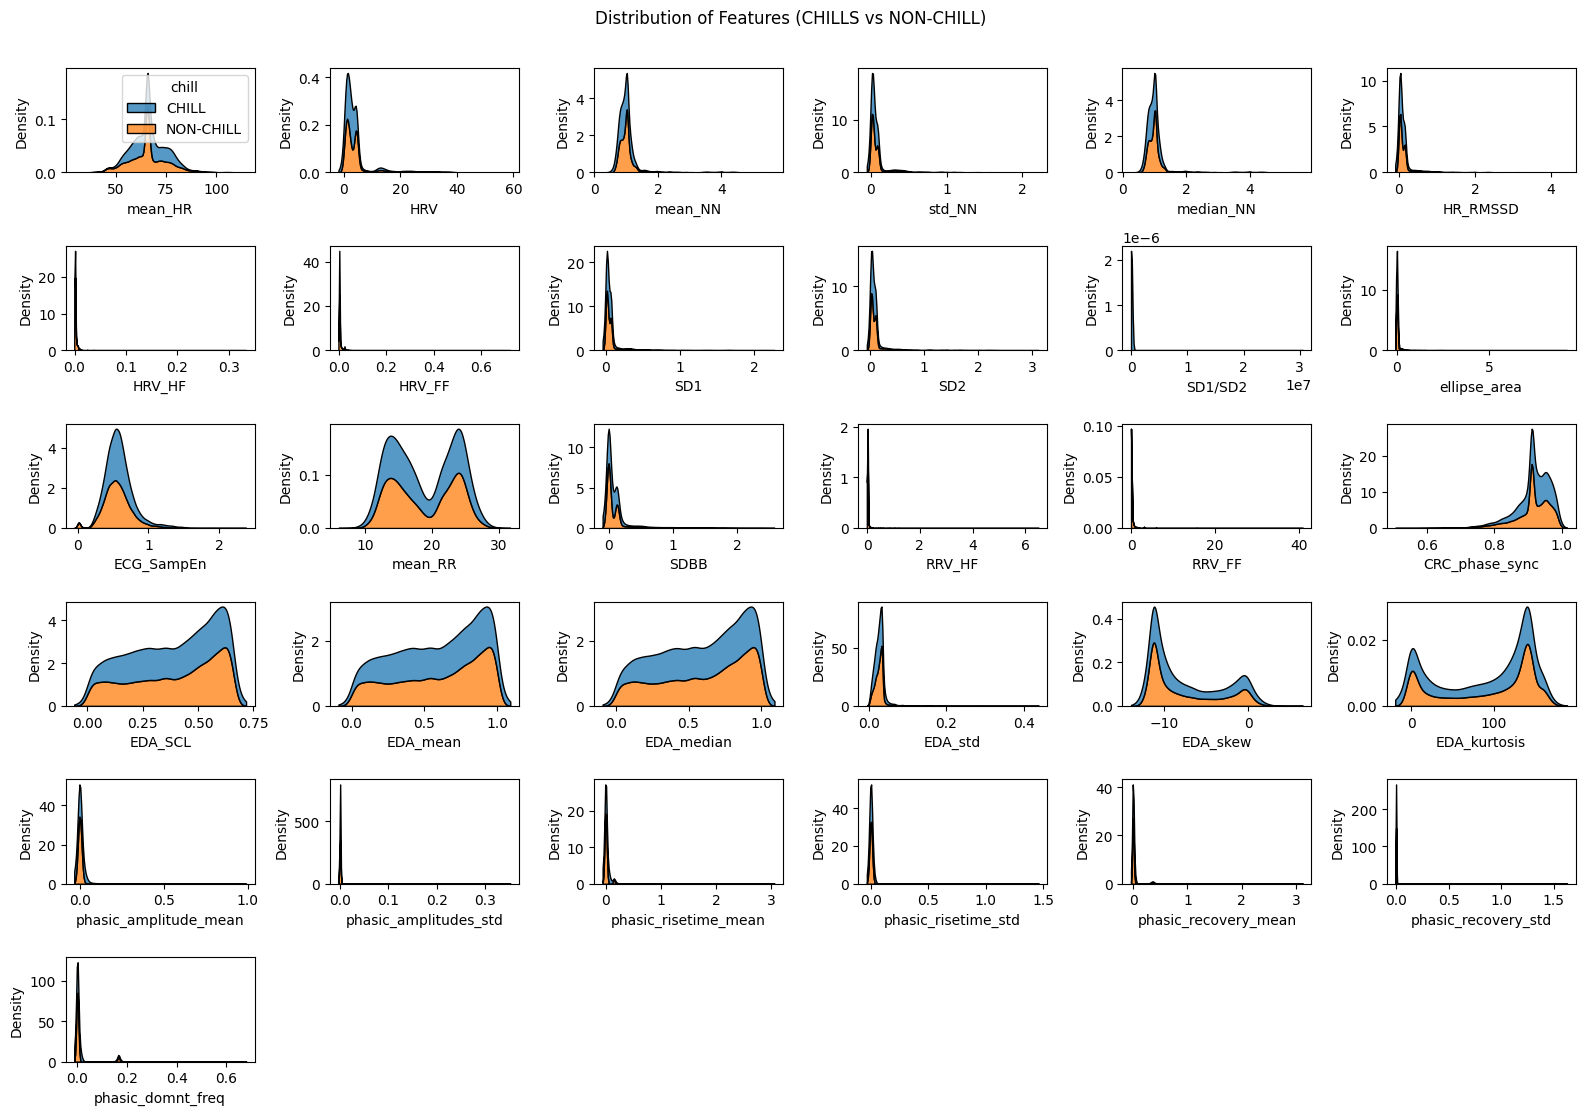

In [ ]:
# @title Features Distribution

fig, ax_ = plt.subplots(6, 6, figsize=(16, 11))
fois = dataset.columns[6:]
for c, col in enumerate(fois):
  sns.kdeplot(data=dataset, x=col, hue="chill", ax=ax_.flatten()[c], multiple="stack", common_norm=False)
  if c!=0:
    ax_.flatten()[c].get_legend().remove()

for c in range(c+1, 36):
  ax_.flatten()[c].axis("off")

# ax_.flatten()[0].legend()
fig.suptitle("Distribution of Features (CHILLS vs NON-CHILL)", y=1.01)
fig.tight_layout()
fig.savefig("plots/features_hist_plot.png", dpi=300, bbox_inches="tight")
plt.show()

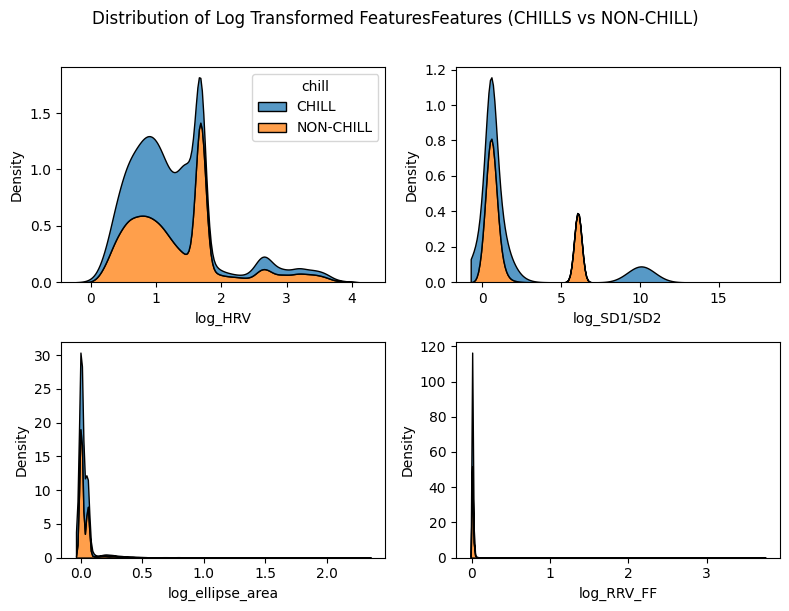

In [ ]:
# @title Log Transformed Features Distribution

log_transform_columns = ["HRV", "SD1/SD2", "ellipse_area", "RRV_FF",]

log_features = pd.DataFrame()
for col in log_transform_columns:
  log_features["log_"+col] = np.log1p(dataset[col])
log_features["chill"] = dataset["chill"]

fig, ax_ = plt.subplots(2, 2, figsize=(8, 6))
fois = log_features.columns[6:]
for c, col in enumerate(log_features.columns[:-1]):
  sns.kdeplot(data=log_features, x=col, hue="chill", ax=ax_.flatten()[c], multiple="stack", common_norm=False)
  if c!=0:
    ax_.flatten()[c].get_legend().remove()

for c in range(c+1, 4):
  ax_.flatten()[c].axis("off")

# ax_.flatten()[0].legend()
fig.suptitle("Distribution of Log Transformed FeaturesFeatures (CHILLS vs NON-CHILL)", y=1.01)
fig.tight_layout()
fig.savefig("plots/log_features_hist_plot.png", dpi=300, bbox_inches="tight")
# plt.show()

In [ ]:
log_features.describe()

,log_HRV,log_SD1/SD2,log_ellipse_area,log_RRV_FF
count,93940.000000,93940.000000,93940.000000,93940.000000
mean,1.326797,1.908561,0.044341,0.011111
std,0.743659,2.364589,0.124870,0.046426
min,0.000000,0.000000,0.000000,0.000000
25%,0.755833,0.471153,0.000678,0.002092
50%,1.222792,0.696247,0.002952,0.005230
75%,1.680162,1.426443,0.055438,0.012070
max,4.059896,17.233591,2.317630,3.733553


In [ ]:
dataset[log_transform_columns].describe()

,HRV,SD1/SD2,ellipse_area,RRV_FF
count,93940.000000,9.394000e+04,93940.000000,93940.000000
mean,4.351918,8.296196e+02,0.056785,0.013787
std,6.333455,1.407859e+05,0.232369,0.253904
min,0.000000,0.000000e+00,0.000000,0.000000
25%,1.129385,6.018395e-01,0.000678,0.002095
50%,2.396659,1.006208e+00,0.002956,0.005244
75%,4.366425,3.163863e+00,0.057004,0.012143
max,56.968263,3.051078e+07,9.151585,40.827440


In [ ]:
dataset = pd.concat([dataset, log_features[log_features.columns[:-1]]], axis=1)
dataset.describe()

,id,epoch,offset,mean_HR,HRV,mean_NN,std_NN,median_NN,HR_RMSSD,HRV_HF,HRV_FF,SD1,SD2,SD1/SD2,ellipse_area,ECG_SampEn,mean_RR,SDBB,RRV_HF,RRV_FF,CRC_phase_sync,EDA_SCL,EDA_mean,EDA_median,EDA_std,EDA_skew,EDA_kurtosis,phasic_amplitude_mean,phasic_amplitudes_std,phasic_risetime_mean,phasic_risetime_std,phasic_recovery_mean,phasic_recovery_std,phasic_domnt_freq,log_HRV,log_SD1/SD2,log_ellipse_area,log_RRV_FF
count,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,9.394000e+04,93940.000000,93940.000000,93940.000000,9.394000e+04,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000,93940.000000
mean,5062.446615,2.373909,1.466468,65.739338,4.351918,1.024565,0.089191,1.015862,0.148930,1.601331e-04,0.000781,0.069075,0.098263,8.296196e+02,0.056785,0.561838,18.875977,0.129812,0.002715,0.013787,0.911248,0.391263,0.595571,0.597331,0.027168,-7.614714,91.974852,0.020105,0.000806,0.026797,0.012624,0.026554,0.001955,0.010090,1.326797,1.908561,0.044341,0.011111
std,36.842019,1.779232,12.291363,9.212273,6.333455,0.387751,0.173970,0.386115,0.322465,1.714069e-03,0.004320,0.137424,0.210587,1.407859e+05,0.232369,0.203600,4.803246,0.301282,0.038115,0.253904,0.055670,0.196233,0.297510,0.298736,0.016513,4.237235,56.598252,0.106588,0.010698,0.178358,0.113243,0.123010,0.025363,0.041080,0.743659,2.364589,0.124870,0.046426
min,5001.000000,0.000000,-20.000000,32.267468,0.000000,0.378000,0.000000,0.378000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.010586,7.502536,0.000000,0.000000,0.000000,0.522663,0.000349,0.000505,0.000021,0.000301,-12.639775,-1.946834,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5030.000000,1.000000,-10.000000,60.455369,1.129385,0.855200,0.015811,0.850000,0.022565,0.000000e+00,0.000039,0.012687,0.017677,6.018395e-01,0.000678,0.435238,14.384567,0.000000,0.000000,0.002095,0.893965,0.227339,0.347273,0.349156,0.019165,-11.217156,34.211440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.755833,0.471153,0.000678,0.002092
50%,5062.000000,2.000000,4.000000,65.722797,2.396659,0.988423,0.032012,0.986000,0.046504,4.692248e-07,0.000188,0.027826,0.040302,1.006208e+00,0.002956,0.543811,18.331841,0.000000,0.000000,0.005244,0.911159,0.429930,0.654596,0.656756,0.027344,-9.607105,115.558302,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.222792,0.696247,0.002952,0.005230
75%,5095.000000,4.000000,12.000000,70.708111,4.366425,1.032525,0.089430,1.025948,0.149336,1.572319e-04,0.000787,0.069220,0.098561,3.163863e+00,0.057004,0.665017,23.480188,0.130076,0.001449,0.012143,0.950392,0.567928,0.863590,0.866277,0.032791,-3.883327,141.146723,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.680162,1.426443,0.055438,0.012070
max,5135.000000,41.000000,20.000000,111.906408,56.968263,5.552000,2.160679,5.552000,4.321357,3.329397e-01,0.721293,2.228801,3.055661,3.051078e+07,9.151585,2.322388,30.273527,2.485030,6.493910,40.827440,0.999123,0.656892,0.998081,0.999996,0.432175,5.200292,171.289859,0.956699,0.348931,3.000000,1.425000,3.083832,1.616766,0.666667,4.059896,17.233591,2.317630,3.733553


In [ ]:
fois = dataset.columns[6:]
fois

Index(['mean_HR', 'HRV', 'mean_NN', 'std_NN', 'median_NN', 'HR_RMSSD',
       'HRV_HF', 'HRV_FF', 'SD1', 'SD2', 'SD1/SD2', 'ellipse_area',
       'ECG_SampEn', 'mean_RR', 'SDBB', 'RRV_HF', 'RRV_FF', 'CRC_phase_sync',
       'EDA_SCL', 'EDA_mean', 'EDA_median', 'EDA_std', 'EDA_skew',
       'EDA_kurtosis', 'phasic_amplitude_mean', 'phasic_amplitudes_std',
       'phasic_risetime_mean', 'phasic_risetime_std', 'phasic_recovery_mean',
       'phasic_recovery_std', 'phasic_domnt_freq', 'log_HRV', 'log_SD1/SD2',
       'log_ellipse_area', 'log_RRV_FF'],
      dtype='object')

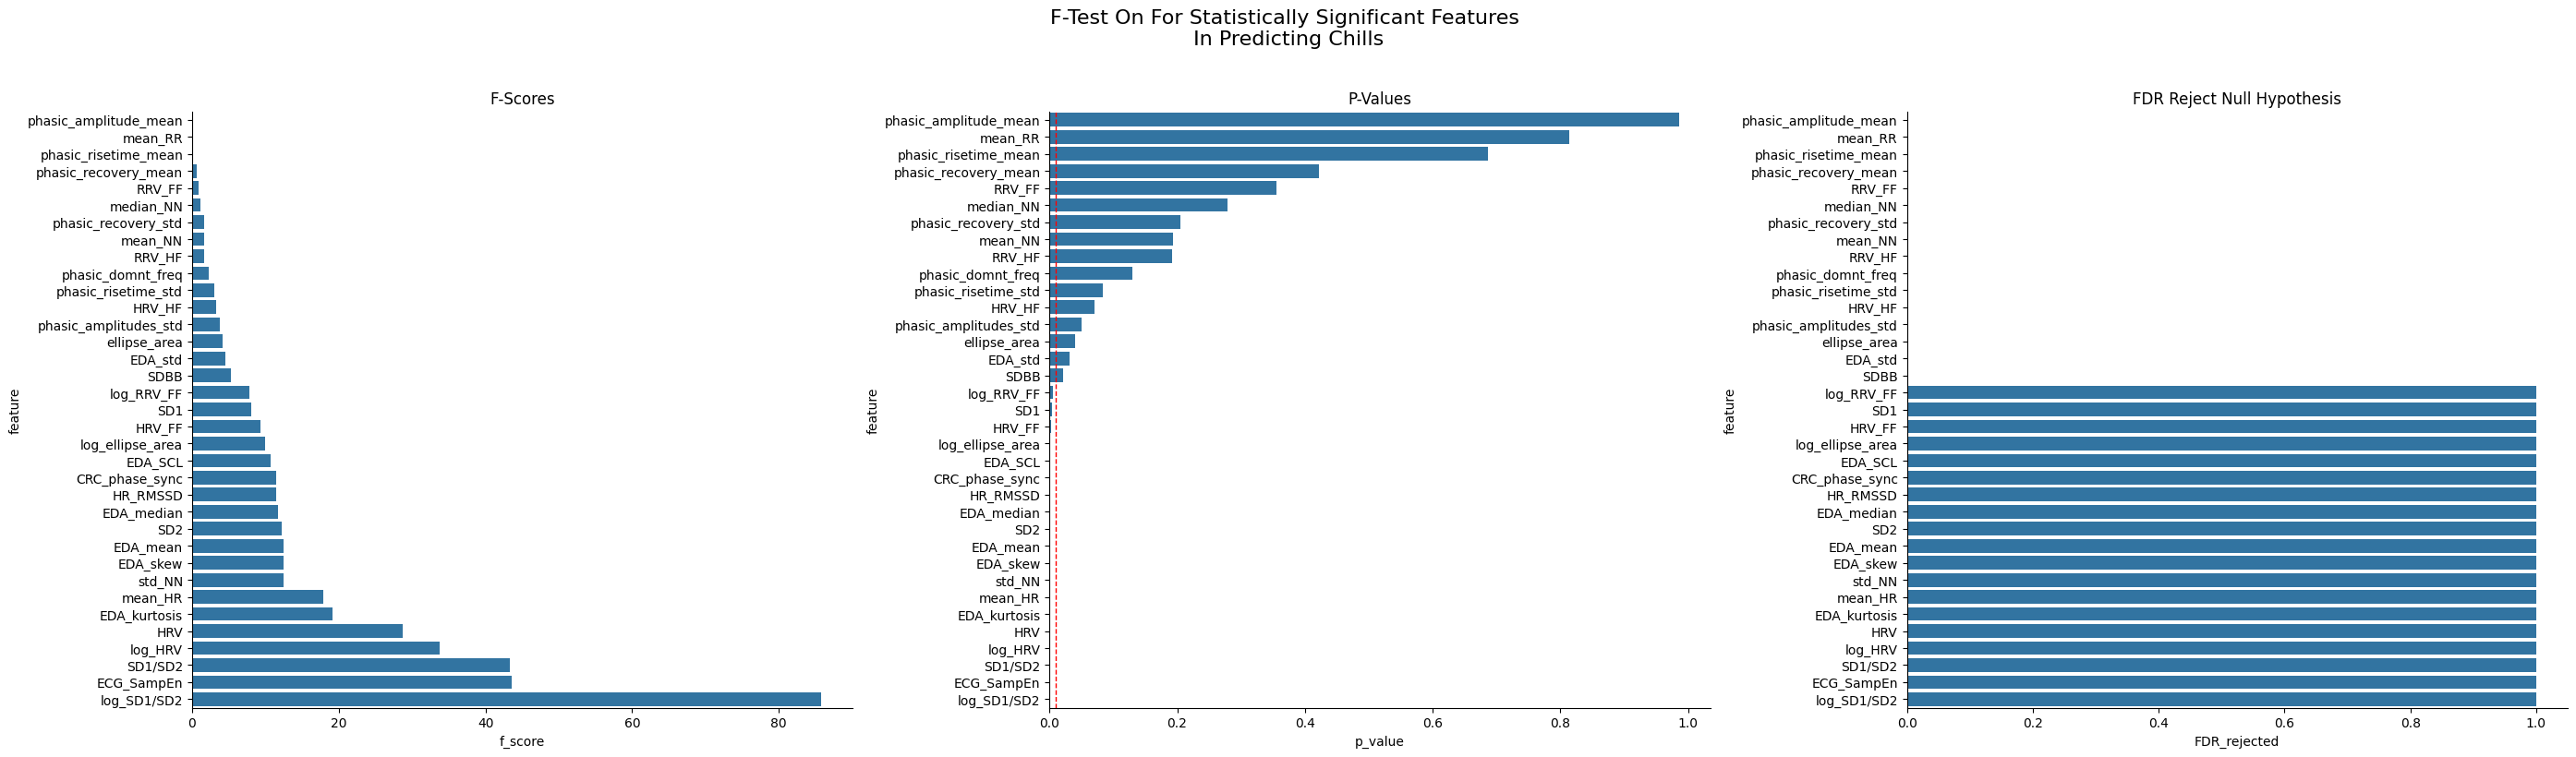

In [ ]:
# @title F-Test & Mutual Information

from sklearn.feature_selection import mutual_info_classif, f_classif
from scipy.stats import f_oneway
from statsmodels.stats.multitest import multipletests

X = dataset[fois]
y = dataset["chill"]

f_scores, p_values = f_classif(X, y)
mi_scores = mutual_info_classif(X,y)
rejected, corrected_pvals = multipletests(p_values, alpha=0.01, method='fdr_bh')[:-2]

importance_df = pd.DataFrame({
    "feature": X.columns,
    "f_score": f_scores,
    "p_value": p_values,
    "mi_score": mi_scores,
    "FDR_rejected": rejected,
    "FDR_corrected_pval": corrected_pvals
})

fig, ax_ = plt.subplots(1, 3, figsize=(28, 8))

# importance_df = importance_df.sort_values(by="mi_score", ascending=True)
# sns.barplot(data=importance_df, x="mi_score", y="feature", ax=ax_[0])

importance_df = importance_df.sort_values(by="p_value", ascending=False)
# importance_df = importance_df.sort_values(by="f_score", ascending=False)
sns.barplot(data=importance_df, x="f_score", y="feature", ax=ax_[0])
ax_[0].set_title("F-Scores")
# importance_df = importance_df.sort_values(by="p_value", ascending=False)
sns.barplot(data=importance_df, x="p_value", y="feature", ax=ax_[1])
ax_[1].set_title("P-Values")
sns.barplot(data=importance_df, x="FDR_rejected", y="feature", ax=ax_[2])
ax_[2].set_title("FDR Reject Null Hypothesis")

ax_[1].axvline(x=0.01, color='red', linestyle='--', linewidth=1)

for ax in ax_:
  ax.spines["top"].set_visible(False)
  ax.spines["right"].set_visible(False)

fig.suptitle("F-Test On For Statistically Significant Features \n In Predicting Chills ", y=1.02, fontsize=16)
plt.tight_layout()

fig.savefig("plots/statistical_feature_importance.png", dpi=300, bbox_inches="tight")

In [ ]:
val_subject = 5086
validation_set = dataset[dataset["id"]==val_subject]
X_val = validation_set.drop(["id", "phase", "epoch", "prior", "chill", "offset"], axis=1)
y_val = validation_set["chill"]
y_val = y_val.apply(lambda x: 0 if x == "NON-CHILL" else 1)

train_test_data = dataset[dataset["id"]!=val_subject]
X = train_test_data.drop(["id", "phase", "epoch", "prior", "chill", "offset"], axis=1)
y = train_test_data["chill"]
y = y.apply(lambda x: 0 if x == "NON-CHILL" else 1)

data = pd.concat([X, y], axis=1)

In [ ]:
# train_ids = train_test_data["id"].unique()[0:71]
# test_ids = train_test_data["id"].unique()[71:]

# train_idx = train_test_data["id"].isin(train_ids)
# test_idx = train_test_data["id"].isin(test_ids)

# X_train ,y_train = X[train_idx], y[train_idx]
# X_test, y_test = X[test_idx], y[test_idx]

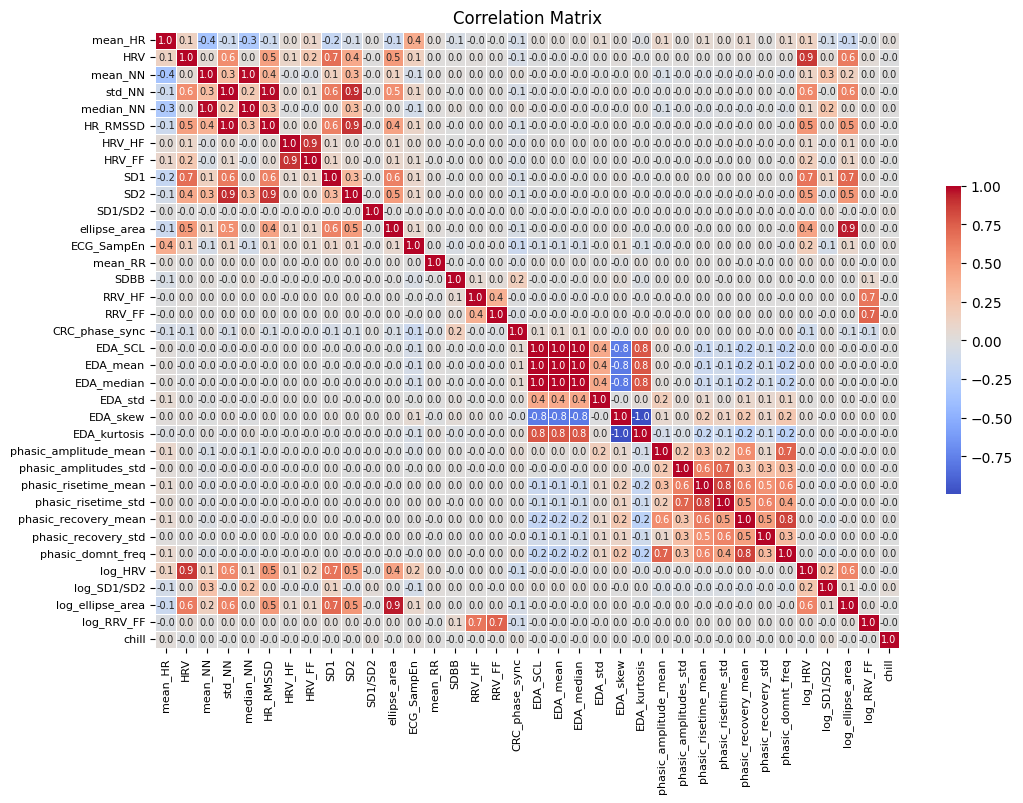

In [ ]:
corr_matx = data.corr()
cols = list(data.columns)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matx, annot=True, cmap="coolwarm", center=0, fmt=".1f", linewidths=0.5, cbar_kws={"shrink": 0.5}, annot_kws={"size": 7})
plt.title("Correlation Matrix")
plt.yticks(np.arange(len(cols)) + 0.5, cols, rotation=0, fontsize=8)  # +0.5 centers the labels
plt.xticks(np.arange(len(cols)) + 0.5, cols, rotation=90, fontsize=8)
plt.savefig("plots/correlation.png", bbox_inches="tight", pad_inches=0.2, dpi=300)
plt.show()


Highly correlated features (|r| >= 0.5):
HRV -- std_NN: 0.552
HRV -- SD1: 0.686
HRV -- log_HRV: 0.877
HRV -- log_ellipse_area: 0.630
mean_NN -- median_NN: 0.978
std_NN -- HRV: 0.552
std_NN -- HR_RMSSD: 0.980
std_NN -- SD1: 0.639
std_NN -- SD2: 0.918
std_NN -- ellipse_area: 0.544
std_NN -- log_HRV: 0.578
std_NN -- log_ellipse_area: 0.600
median_NN -- mean_NN: 0.978
HR_RMSSD -- std_NN: 0.980
HR_RMSSD -- SD1: 0.606
HR_RMSSD -- SD2: 0.897
HR_RMSSD -- log_HRV: 0.506
HRV_HF -- HRV_FF: 0.893
HRV_FF -- HRV_HF: 0.893
SD1 -- HRV: 0.686
SD1 -- std_NN: 0.639
SD1 -- HR_RMSSD: 0.606
SD1 -- ellipse_area: 0.610
SD1 -- log_HRV: 0.664
SD1 -- log_ellipse_area: 0.708
SD2 -- std_NN: 0.918
SD2 -- HR_RMSSD: 0.897
SD2 -- log_ellipse_area: 0.510
ellipse_area -- std_NN: 0.544
ellipse_area -- SD1: 0.610
ellipse_area -- log_ellipse_area: 0.948
RRV_HF -- log_RRV_FF: 0.655
RRV_FF -- log_RRV_FF: 0.734
EDA_SCL -- EDA_mean: 1.000
EDA_SCL -- EDA_median: 0.999
EDA_SCL -- EDA_skew: -0.781
EDA_SCL -- EDA_kurtosis: 0.779


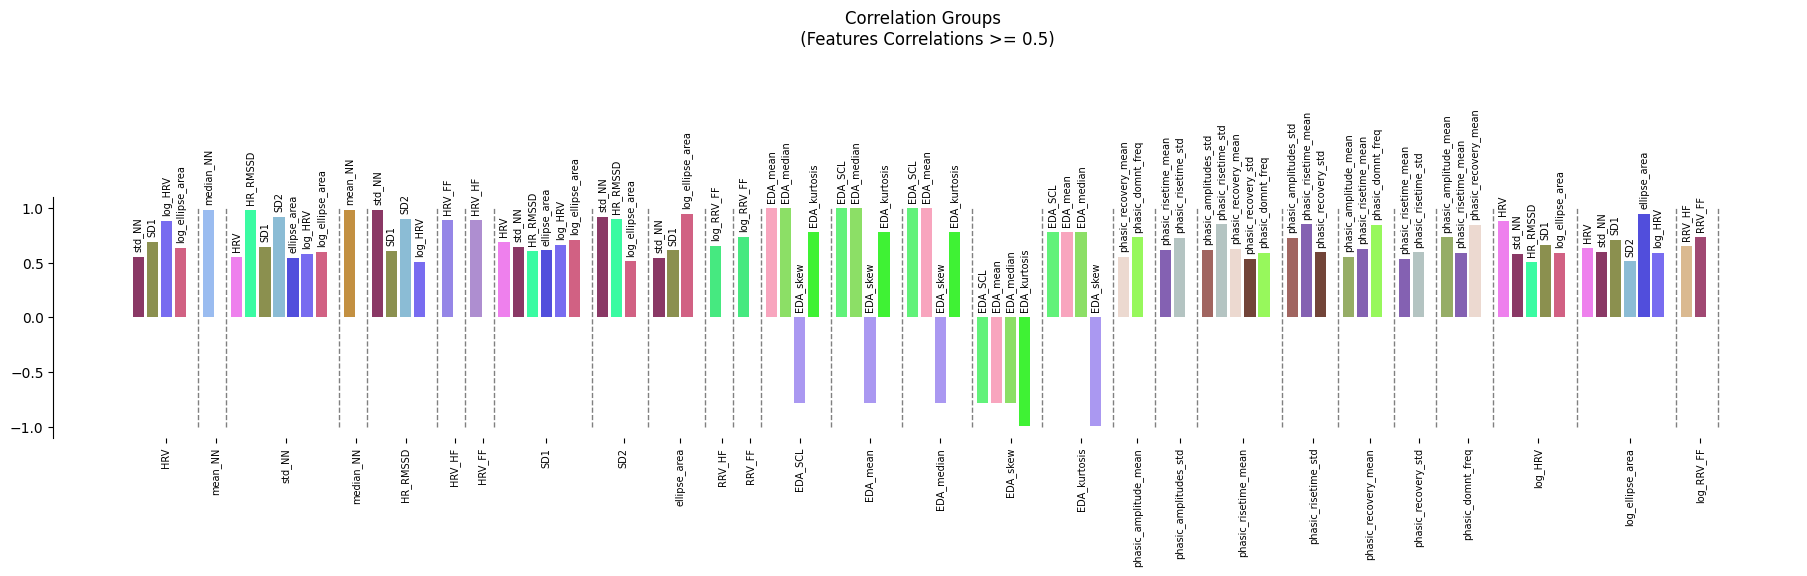

In [ ]:
# @title Features Correlation Groups

import random

threshold = 0.5
correlated_variables = []
high_corr = np.where(np.abs(corr_matx) >= threshold)
high_corr = [[x, y]
              for x, y in zip(*high_corr) if x != y]
if high_corr:
    print(f"\nHighly correlated features (|r| >= {threshold}):")
    for x, y in high_corr:
        print(f"{corr_matx.index[x]} -- {corr_matx.columns[y]}: {corr_matx.iloc[x, y]:.3f}")
        correlated_variables.append(corr_matx.index[x])
        correlated_variables.append(corr_matx.index[y])

correlated_variables = list(set(correlated_variables))


num_columns = len(corr_matx.columns)
# cmap = get_cmap('tab20b', num_columns)  # Use a colormap with enough distinct colors
# color_map = {col: cmap(i) for i, col in enumerate(corr_matx.columns)}
color_map = {col: (random.random(), random.random(), random.random(), 0.8) for i, col in enumerate(corr_matx.columns)}

high_corr = np.array(high_corr)

xs, ys = high_corr[:,0], high_corr[:,1]
figure = plt.figure(figsize=(threshold*45, threshold*25/4))
xticks, xlabels = [], []
legend_handles = []

x_pos = 0
for x_idx, x in enumerate(np.unique(xs)):

  y_idx = np.where(xs==x)[0]
  corrs = np.array(corr_matx.iloc[x, ys[y_idx]])

  # legend_handles += [plt.Line2D([0], [0], color=color_map[corr_matx.columns[y_]],
  #                               lw=4, label=corr_matx.columns[y_]) for y_ in ys[y_idx]]

  plt.bar([x_pos + i for i in range(len(corrs))], corrs, color=[color_map[corr_matx.columns[y_]] for y_ in ys[y_idx]])

  for x_, y_, y_id in zip([x_pos + i for i in range(len(corrs))], corrs, ys[y_idx]):
    y_  = (y_ + 0.05) if y_ > 0 else (0 + 0.05)
    plt.text(x_, y_, corr_matx.columns[y_id], rotation=90, ha='center', va='bottom', fontsize=7)

  plt.vlines(x_pos + len(corrs) + 0.25, -1, 1, "gray", linestyle='--', linewidth=1)
  xticks.append((x_pos + (x_pos + len(corrs))) / 2)
  xlabels.append(corr_matx.columns[x])
  x_pos += len(corrs) + 1

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xticks(xticks, xlabels, fontsize=7, rotation=90)
# plt.ylim(-1.05, 1.05)
plt.title(f"Correlation Groups \n (Features Correlations >= {threshold})", y=1.6)
plt.tight_layout()
plt.savefig("plots/correlation_groups.png", bbox_inches="tight")

#### Most Correlated Features with Target

In [ ]:
features = data.columns

target_correlated_features = corr_matx["chill"]
target_correlated_features = target_correlated_features[abs(target_correlated_features) > 0.01]
target_correlated_features = target_correlated_features.drop("chill")
print(target_correlated_features)
# target_correlated_features = target_correlated_features.index

mean_HR           0.020731
HRV              -0.013875
std_NN           -0.010310
SD2              -0.010842
SD1/SD2           0.022670
ECG_SampEn        0.017397
CRC_phase_sync    0.012206
EDA_mean         -0.010742
EDA_median       -0.010292
log_HRV          -0.015004
log_SD1/SD2       0.035800
Name: chill, dtype: float64


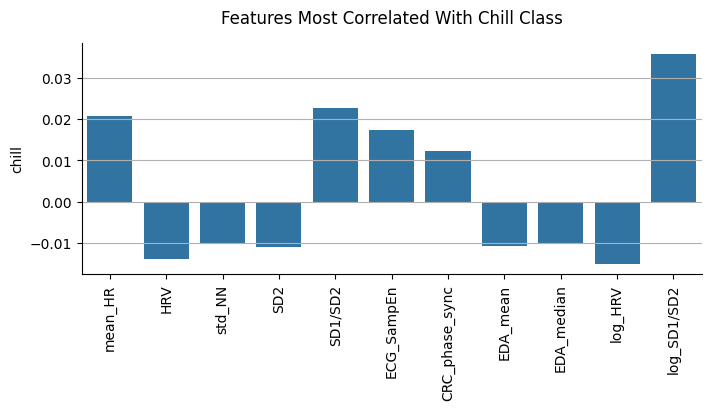

In [ ]:
plt.figure(figsize=(8, 3))
sns.barplot(target_correlated_features)
plt.xticks(rotation=90)
plt.grid(axis="y")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title("Features Most Correlated With Chill Class", y=1.05)
plt.savefig("plots/target_correlated_features.png", bbox_inches="tight", pad_inches=0.2, dpi=300)

#### Final Dropping of Features

In [ ]:
# fois.remove("HRV")
# fois.remove("SD1/SD2")
# fois.remove("RRV_FF")
# fois.remove("ellipse_area")
dataset = dataset.drop(["HRV", "SD1/SD2", "RRV_FF", "ellipse_area"], axis=1)
fois = dataset.columns[6:]

## Modelling

In [ ]:
# fois = X.columns
fois

Index(['mean_HR', 'mean_NN', 'std_NN', 'median_NN', 'HR_RMSSD', 'HRV_HF',
       'HRV_FF', 'SD1', 'SD2', 'ECG_SampEn', 'mean_RR', 'SDBB', 'RRV_HF',
       'CRC_phase_sync', 'EDA_SCL', 'EDA_mean', 'EDA_median', 'EDA_std',
       'EDA_skew', 'EDA_kurtosis', 'phasic_amplitude_mean',
       'phasic_amplitudes_std', 'phasic_risetime_mean', 'phasic_risetime_std',
       'phasic_recovery_mean', 'phasic_recovery_std', 'phasic_domnt_freq',
       'log_HRV', 'log_SD1/SD2', 'log_ellipse_area', 'log_RRV_FF'],
      dtype='object')

In [ ]:
val_subject = 5086
validation_set = dataset[dataset["id"]==val_subject]
X_val = validation_set.drop(["id", "phase", "epoch", "prior", "chill", "offset"], axis=1)
y_val = validation_set["chill"]
y_val = y_val.apply(lambda x: 0 if x == "NON-CHILL" else 1)

train_test_data = dataset[dataset["id"]!=val_subject]
X = train_test_data.drop(["id", "phase", "epoch", "prior", "chill", "offset"], axis=1)
X = X[fois]
y = train_test_data["chill"]
y = y.apply(lambda x: 0 if x == "NON-CHILL" else 1)

data = pd.concat([X, y], axis=1)

In [ ]:
import random
np.random.seed(42)
random.seed(42)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GroupShuffleSplit

# X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2)

# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# for train_index, test_index in sss.split(X, y):
#     X_train_temp, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train_temp, y_test = y.iloc[train_index], y.iloc[test_index]

gss = GroupShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
for train_index, test_index in gss.split(X, y, groups=train_test_data["id"]):
    X_train_temp, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train_temp, y_test = y.iloc[train_index], y.iloc[test_index]

# from collections import Counter
# print("Train class distribution:", Counter(y_train_temp))
# print("Test class distribution:", Counter(y_test))

In [ ]:
# imblearn_="NONE"
# X_train, y_train = X_train_temp, y_train_temp

neg_idx = np.where(y_train_temp==0)[0]
pos_idx = np.where(y_train_temp==1)[0]
y_idx = [idx.item() for idx in random.sample(list(neg_idx), 7150)] + list(pos_idx)
X_train = np.array(X_train_temp)[y_idx]
y_train = np.array(y_train_temp)[y_idx]
imblearn_ = "random_under_sample"

X_test = np.array(X_test)
y_test = np.array(y_test)

# random_sampler = RandomUnderSampler(sampling_strategy=0.5)
# X_train, y_train = random_sampler.fit_resample(X_train_temp, y_train_temp)
# imblearn_ = "underSample"

smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
imblearn_ = "SMOTE"

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.metrics import roc_auc_score, roc_curve, matthews_corrcoef
from imblearn.metrics import geometric_mean_score

In [ ]:
# @title Checkpointing Models Performance

test_models_performance = pd.DataFrame(columns=["Model", "SearchCV", "folds", "HyperParams", "refit", "class-weight", "Train-Accuracy", "Val-Accuracy", "F1-Score", "Recall", "Precision", "ROC_AUC",])
val_models_performance = pd.DataFrame(columns=["Model", "SearchCV", "folds", "HyperParams", "refit", "class-weight", "Train-Accuracy", "Val-Accuracy", "F1-Score", "Recall", "Precision", "ROC_AUC",])

def save_model_metrics(name, search, cv, optim_metric, balance, train, val, model, threshold=0.5, df=None):

  x_train, y_train = train[0], train[1]
  x_val, y_val = val[0], val[1]

  model_details = pd.DataFrame([{
    "Model": name,
    "SearchCV": search,
    "folds": cv,
    "HyperParams": model.best_params_,
    "refit": optim_metric,
    "class-weight": balance,
    "Train-Accuracy": accuracy_score(y_train, model.best_estimator_.predict_proba(x_train)[:,1] > threshold),
    "Val-Accuracy": accuracy_score(y_val, model.best_estimator_.predict_proba(x_val)[:,1] > threshold),
    "F1-Score": f1_score(y_val, model.best_estimator_.predict_proba(x_val)[:,1] > threshold),
    "Recall": recall_score(y_val, model.best_estimator_.predict_proba(x_val)[:,1] > threshold),
    "Precision": precision_score(y_val, model.best_estimator_.predict_proba(x_val)[:,1] > threshold),
    "ROC_AUC": roc_auc_score(y_val, model.best_estimator_.predict_proba(x_val)[:,1]),
    "mthw_corr": matthews_corrcoef(y_val, model.best_estimator_.predict_proba(x_val)[:,1] > threshold),
    "geometric_mean": geometric_mean_score(y_val, model.best_estimator_.predict_proba(x_val)[:,1] > threshold),
    "threshold": threshold
    }])

  df = pd.concat([df, model_details], ignore_index=True)
  return df

In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([7150, 3575]))

In [ ]:
tune = "recall"

#### Logistic Regression

In [ ]:
np.random.seed(42)

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_params = {
    "C": np.logspace(-4, 1, 5),
    "penalty": ["l1", "l2"],
    "solver": ["liblinear"],
    "class_weight": ["balanced"]
}

n_folds = 5
scoring_ = ["f1", "precision", "recall", "accuracy"]

grid_log_reg = GridSearchCV(log_reg, log_params, scoring=tune, cv=n_folds, n_jobs=-1, verbose=1)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_
print(grid_log_reg.best_params_)

# rand_log_reg = RandomizedSearchCV(log_reg, log_params, scoring="recall", cv=n_folds, n_jobs=-1, verbose=1)
# rand_log_reg.fit(X_train[fois], y_train)
# log_reg = rand_log_reg.best_estimator_
# print(rand_log_reg.best_params_)

y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)

train_acc = accuracy_score(y_train, log_reg.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

print(f"Train Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'C': np.float64(10.0), 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Train Accuracy: 0.6347785547785548
Test Accuracy: 0.6166315366857372


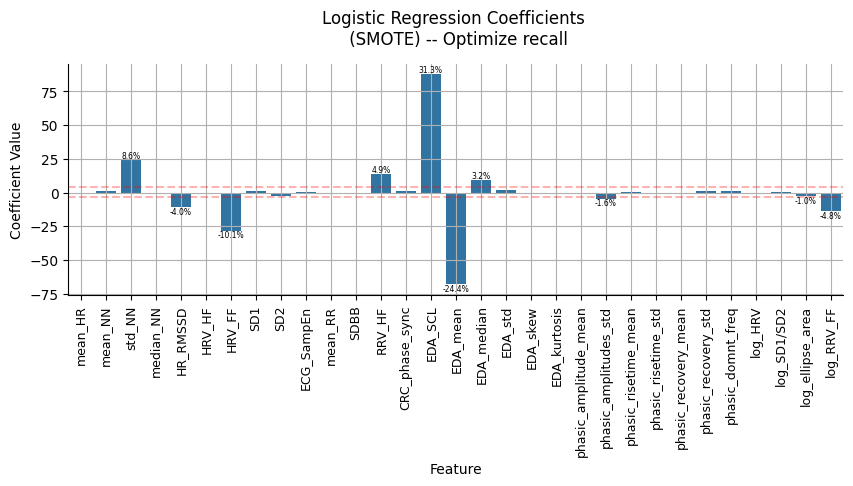

In [ ]:
log_reg_coefs = log_reg.coef_[0]
log_reg_coefs_percent = log_reg_coefs / np.abs(log_reg_coefs).sum() * 100
log_reg_intercept = log_reg.intercept_

plt.figure(figsize=(10, 3))
ax = sns.barplot(x=fois, y=log_reg_coefs)

# Add percentage labels on top of each bar
for i, (bar, percent) in enumerate(zip(ax.patches, log_reg_coefs_percent)):
    if abs(percent) < 1:
        continue
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of the bar)
        bar.get_height(),  # Y position (top of the bar)
        f"{percent:.1f}%",  # Format percentage
        ha="center",
        va="bottom" if bar.get_height() > 0 else "top",  # Adjust for negative values
        fontsize=5.5,
        color="black"
    )

plt.ylabel("Coefficient Value")
plt.xlabel("Feature")
plt.axhline(y=0.05*max(log_reg_coefs), color="red", linestyle="--", alpha=0.3)
plt.axhline(y=0.05*min(log_reg_coefs), color="red", linestyle="--", alpha=0.3)
plt.xticks(rotation=90, fontsize=9)
# plt.ylim(log_reg_coefs.min()-20, log_reg_coefs.max()+20)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid()
plt.title(f"Logistic Regression Coefficients \n ({imblearn_}) -- Optimize {tune}", y=1.05)
plt.savefig(f"plots/log_reg_coefs_{imblearn_}_{tune}.png", bbox_inches="tight", pad_inches=0.2, dpi=300)

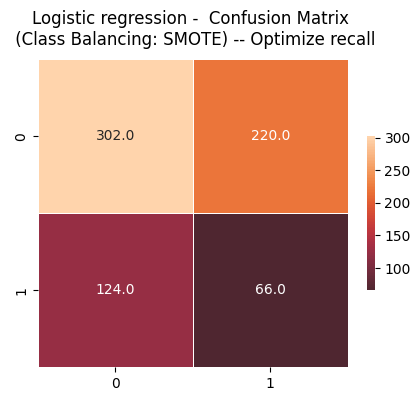

In [ ]:
y_pred = log_reg.predict_proba(X_val[fois])
mtx = confusion_matrix(y_val, y_pred[:,1] > 0.5)

plt.figure(figsize=(5,4))
sns.heatmap(mtx, annot=True, center=0, fmt=".1f", linewidths=0.5, cbar_kws={"shrink": 0.5})
plt.title(f"Logistic regression -  Confusion Matrix \n (Class Balancing: {imblearn_}) -- Optimize {tune}", y=1.02)
plt.savefig(f"plots/ConfusionMatrix_LogReg_{imblearn_}_{tune}.png", bbox_inches="tight", pad_inches=0.2, dpi=300)

In [ ]:
val_models_performance = save_model_metrics("LogReg", "GridSearch", n_folds, tune, imblearn_, [X_train, y_train], [X_val, y_val], grid_log_reg, 0.5, val_models_performance)
test_models_performance = save_model_metrics("LogReg", "GridSearch", n_folds, tune, imblearn_, [X_train, y_train], [X_test, y_test], grid_log_reg, 0.5, test_models_performance)

In [ ]:
test_models_performance

,Model,SearchCV,folds,HyperParams,refit,class-weight,Train-Accuracy,Val-Accuracy,F1-Score,Recall,Precision,ROC_AUC,mthw_corr,geometric_mean,threshold
0,LogReg,GridSearch,5,"{'C': 10.0, 'class_weight': 'balanced', 'penal...",recall,SMOTE,0.634779,0.616632,0.049521,0.62776,0.025777,0.645919,0.062723,0.62208,0.5


In [ ]:
val_models_performance

,Model,SearchCV,folds,HyperParams,refit,class-weight,Train-Accuracy,Val-Accuracy,F1-Score,Recall,Precision,ROC_AUC,mthw_corr,geometric_mean,threshold
0,LogReg,GridSearch,5,"{'C': 10.0, 'class_weight': 'balanced', 'penal...",recall,SMOTE,0.634779,0.516854,0.277311,0.347368,0.230769,0.504688,-0.066845,0.448294,0.5


#### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_for = RandomForestClassifier()
rnf_params = {
    "n_estimators": np.arange(50, 450, 50),
    "max_depth": [int(len(fois)**i) for i in np.arange(0.5, 2.5, 0.5)],
    "min_samples_split": (np.arange(0.05, 0.3, 0.05)*X.shape[0]).astype(np.uint16),
    "min_samples_leaf": (np.arange(0.01, 0.07, 0.01)*X.shape[0]).astype(np.uint16),
    "bootstrap": [False],
    "criterion": ["gini", "entropy"],
    "class_weight": ["balanced"],
}

# fois = X.columns
n_folds = 5
scoring_ = ["f1", "precision", "recall", "accuracy"]

# grid_rnd_for = GridSearchCV(rnd_for, rnf_params, scoring="f1", cv=n_folds, n_jobs=-1, verbose=1)
# grid_rnd_for.fit(X_train, y_train)
# rnd_for = grid_rnd_for.best_estimator_
# print(grid_rnd_for.best_params_)

rand_rnd_for = RandomizedSearchCV(rnd_for, rnf_params, scoring=tune, cv=n_folds, n_jobs=-1, verbose=1)
rand_rnd_for.fit(X_train, y_train)
rnd_for = rand_rnd_for.best_estimator_
print(rand_rnd_for.best_params_)

y_pred = rnd_for.predict(X_test)
y_proba = rnd_for.predict_proba(X_test)

train_acc = accuracy_score(y_train, rnd_for.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

print(f"Train Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': np.int64(250), 'min_samples_split': np.uint16(4661), 'min_samples_leaf': np.uint16(1864), 'max_depth': 961, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': False}
Train Accuracy: 0.6066200466200466
Test Accuracy: 0.5539997992572518


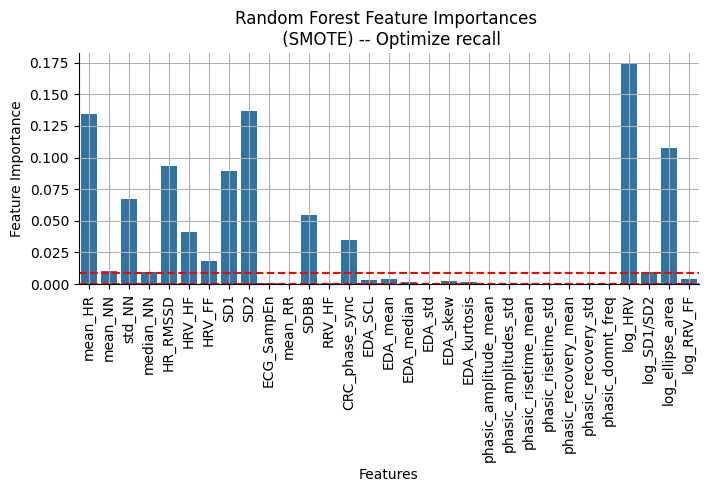

In [ ]:
rnd_for_fi = rnd_for.feature_importances_

plt.figure(figsize=(8, 3))

sns.barplot(x=fois, y=rnd_for_fi)
plt.axhline(y=0.05*max(rnd_for_fi), color="red", linestyle="--")
plt.axhline(y=0.05*min(rnd_for_fi), color="red", linestyle="--")
plt.xticks(rotation=90)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid()
plt.ylabel("Feature Importance")
plt.xlabel("Features")
plt.title(f"Random Forest Feature Importances \n ({imblearn_}) -- Optimize {tune}")
plt.savefig(f"plots/rnd_for_fi_{imblearn_}_{tune}.png", bbox_inches="tight", pad_inches=0.2, dpi=300)

In [ ]:
# y_pred = rnd_for.predict_proba(X_test[fois])

# brier_thresholds = []
# brier_accs = []
# brier_f1s = []
# brier_precisions = []
# brier_recalls = []
# brier_roc_auc = []

# for threshold in np.logspace(-4, 0, 100):
#     y_pred_thresh = y_pred[:, 1] > threshold
#     brier_thresholds.append(threshold)
#     brier_accs.append(accuracy_score(y_test, y_pred_thresh))
#     brier_f1s.append(f1_score(y_test, y_pred_thresh))
#     brier_precisions.append(precision_score(y_test, y_pred_thresh))
#     brier_recalls.append(recall_score(y_test, y_pred_thresh))
#     brier_roc_auc.append(roc_auc_score(y_test, y_pred[:, 1]))

# best_acc_threshold = brier_thresholds[np.argmax(brier_accs)]
# best_f1_threshold = brier_thresholds[np.argmax(brier_f1s)]
# idx = np.argmax(brier_f1s)

# plt.figure(figsize=(6, 4))
# plt.plot(brier_thresholds, brier_accs, label="Accuracy", linestyle="--", alpha=0.5)
# plt.plot(brier_thresholds, brier_f1s, label="F1 Score", linestyle="--", alpha=0.5)
# plt.plot(brier_thresholds, brier_precisions, label="Precision", alpha=0.7)
# plt.plot(brier_thresholds, brier_recalls, label="Recall", alpha=0.7)
# plt.plot(brier_thresholds, brier_roc_auc, linestyle="--", label="ROC AUC", alpha=0.4)

# plt.ylim(0, 1)

# plt.gca().spines["top"].set_visible(False)
# plt.gca().spines["right"].set_visible(False)
# plt.xlabel("Threshold")
# plt.ylabel("Metric")
# plt.title(f"Random Forest \n Threshold Curve \n ({imblearn_})", y=1.06)
# plt.legend(loc="lower left")
# plt.grid()
# # plt.savefig(f"plots/SVC_threshold_curve_{imblearn_}.png", bbox_inches="tight", pad_inches=0.2, dpi=300)

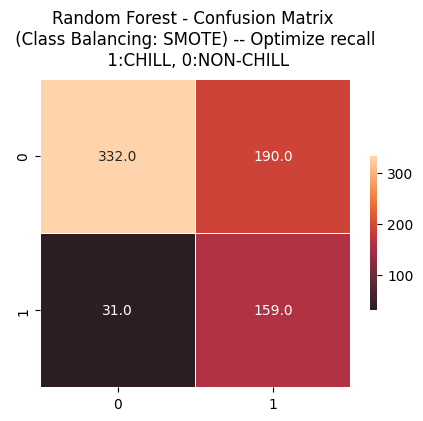

In [ ]:
y_pred = rnd_for.predict_proba(X_val[fois])
mtx = confusion_matrix(y_val, y_pred[:,1] > 0.5)

plt.figure(figsize=(5,4))
sns.heatmap(mtx, annot=True, center=0, fmt=".1f", linewidths=0.5, cbar_kws={"shrink": 0.5})
plt.title(f"Random Forest - Confusion Matrix \n (Class Balancing: {imblearn_}) -- Optimize {tune} \n 1:CHILL, 0:NON-CHILL", y=1.02)
plt.savefig(f"plots/ConfusionMatrix_RandomForest_{imblearn_}_{tune}.png", bbox_inches="tight", pad_inches=0.2, dpi=300)

In [ ]:
val_models_performance = save_model_metrics("RandomForest", "RandomSearch", n_folds, tune, imblearn_, [X_train, y_train], [X_val, y_val], rand_rnd_for, 0.5, val_models_performance)
test_models_performance = save_model_metrics("RandomForest", "RandomSearch", n_folds, tune, imblearn_, [X_train, y_train], [X_test, y_test], rand_rnd_for, 0.5, test_models_performance)

In [ ]:
test_models_performance

,Model,SearchCV,folds,HyperParams,refit,class-weight,Train-Accuracy,Val-Accuracy,F1-Score,Recall,Precision,ROC_AUC,mthw_corr,geometric_mean,threshold
0,LogReg,GridSearch,5,"{'C': 10.0, 'class_weight': 'balanced', 'penal...",recall,SMOTE,0.634779,0.616632,0.049521,0.62776,0.025777,0.645919,0.062723,0.622080,0.5
1,RandomForest,RandomSearch,5,"{'n_estimators': 250, 'min_samples_split': 466...",recall,SMOTE,0.606620,0.554000,0.054876,0.81388,0.028395,0.779583,0.091364,0.668932,0.5


In [ ]:
val_models_performance

,Model,SearchCV,folds,HyperParams,refit,class-weight,Train-Accuracy,Val-Accuracy,F1-Score,Recall,Precision,ROC_AUC,mthw_corr,geometric_mean,threshold
0,LogReg,GridSearch,5,"{'C': 10.0, 'class_weight': 'balanced', 'penal...",recall,SMOTE,0.634779,0.516854,0.277311,0.347368,0.230769,0.504688,-0.066845,0.448294,0.5
1,RandomForest,RandomSearch,5,"{'n_estimators': 250, 'min_samples_split': 466...",recall,SMOTE,0.606620,0.689607,0.589981,0.836842,0.455587,0.784342,0.418385,0.729551,0.5


#### SVM

In [ ]:
from sklearn.svm import SVC

svc = SVC()

svc_params = {
    "C": np.logspace(-4, 1, 5),
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto"],
    "class_weight": ["balanced"],
    "max_iter": np.arange(5000, 5500, 10),
    "probability": [True],
}

fois = X.columns
n_folds = 5
scoring_ = ["f1", "precision", "recall", "accuracy"]

# svc.fit(X_train[fois], y_train)

# grid_svc = GridSearchCV(svc, svc_params, scoring="f1", cv=n_folds, n_jobs=-1, verbose=1)
# grid_svc.fit(X_train, y_train)
# svc = grid_svc.best_estimator_
# print(grid_svc.best_params_)

rnd_svc = RandomizedSearchCV(svc, svc_params, scoring="precision", cv=n_folds, n_jobs=-1, verbose=1)
rnd_svc.fit(X_train, y_train)
svc = rnd_svc.best_estimator_
print(rnd_svc.best_params_)

y_pred = svc.predict(X_test)
y_proba = svc.predict_proba(X_test)

train_acc = accuracy_score(y_train, svc.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

print(f"Train Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'probability': True, 'max_iter': np.int64(5240), 'kernel': 'rbf', 'gamma': 'auto', 'class_weight': 'balanced', 'C': np.float64(10.0)}
Train Accuracy: 0.9328671328671329
Test Accuracy: 0.8838201344976413


In [ ]:
# y_pred = svc.predict_proba(X_test[fois])

# brier_thresholds = []
# brier_accs = []
# brier_f1s = []
# brier_precisions = []
# brier_recalls = []
# brier_roc_auc = []

# for threshold in np.logspace(-4, 0, 100):
#     y_pred_thresh = y_pred[:, 1] > threshold
#     brier_thresholds.append(threshold)
#     brier_accs.append(accuracy_score(y_test, y_pred_thresh))
#     brier_f1s.append(f1_score(y_test, y_pred_thresh))
#     brier_precisions.append(precision_score(y_test, y_pred_thresh))
#     brier_recalls.append(recall_score(y_test, y_pred_thresh))
#     brier_roc_auc.append(roc_auc_score(y_test, y_pred[:, 1]))

# best_acc_threshold = brier_thresholds[np.argmax(brier_accs)]
# best_f1_threshold = brier_thresholds[np.argmax(brier_f1s)]
# idx = np.argmax(brier_f1s)

# plt.figure(figsize=(6, 4))
# plt.plot(brier_thresholds, brier_accs, label="Accuracy", linestyle="--", alpha=0.5)
# plt.plot(brier_thresholds, brier_f1s, label="F1 Score", linestyle="--", alpha=0.5)
# plt.plot(brier_thresholds, brier_precisions, label="Precision", alpha=0.7)
# plt.plot(brier_thresholds, brier_recalls, label="Recall", alpha=0.7)
# plt.plot(brier_thresholds, brier_roc_auc, linestyle="--", label="ROC AUC", alpha=0.4)

# plt.ylim(0, 1)

# plt.gca().spines["top"].set_visible(False)
# plt.gca().spines["right"].set_visible(False)
# plt.xlabel("Threshold")
# plt.ylabel("Metric")
# plt.title(f"SVC \n Threshold Curve \n ({imblearn_})", y=1.06)
# plt.legend(loc="upper right")
# plt.grid()
# plt.savefig(f"plots/SVC_threshold_curve_{imblearn_}.png", bbox_inches="tight", pad_inches=0.2, dpi=300)

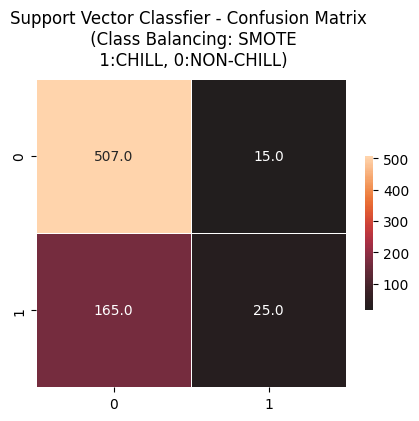

In [ ]:
y_pred = svc.predict_proba(X_val[fois])
mtx = confusion_matrix(y_val, y_pred[:,1] > 0.5)

plt.figure(figsize=(5,4))
sns.heatmap(mtx, annot=True, center=0, fmt=".1f", linewidths=0.5, cbar_kws={"shrink": 0.5})
plt.title(f"Support Vector Classfier - Confusion Matrix \n (Class Balancing: {imblearn_}\n 1:CHILL, 0:NON-CHILL)", y=1.02)
plt.savefig(f"plots/ConfusionMatrix_SVC_{imblearn_}.png", bbox_inches="tight", pad_inches=0.2, dpi=300)

In [ ]:
# val_models_performance = save_model_metrics("SVC", "RandomSearch", n_folds, tune, imblearn_, [X_train, y_train], [X_val, y_val], rnd_svc, 0.5, val_models_performance)
test_models_performance = save_model_metrics("SVC", "RandomSearch", n_folds, tune, imblearn_, [X_train, y_train], [X_test, y_test], rnd_svc, 0.5, test_models_performance)

In [ ]:
test_models_performance

,Model,SearchCV,folds,HyperParams,refit,class-weight,Train-Accuracy,Val-Accuracy,F1-Score,Recall,Precision,ROC_AUC,mthw_corr,geometric_mean,threshold
0,LogReg,GridSearch,5,"{'C': 10.0, 'class_weight': 'balanced', 'penal...",recall,SMOTE,0.634779,0.616632,0.049521,0.627760,0.025777,0.645919,0.062723,0.622080,0.5
1,RandomForest,RandomSearch,5,"{'n_estimators': 250, 'min_samples_split': 466...",recall,SMOTE,0.606620,0.554000,0.054876,0.813880,0.028395,0.779583,0.091364,0.668932,0.5
2,SVC,RandomSearch,5,"{'probability': True, 'max_iter': 5240, 'kerne...",recall,SMOTE,0.953287,0.927883,0.112415,0.287066,0.069892,0.661817,0.114076,0.518978,0.5


In [ ]:
val_models_performance

,Model,SearchCV,folds,HyperParams,refit,class-weight,Train-Accuracy,Val-Accuracy,F1-Score,Recall,Precision,ROC_AUC,mthw_corr,geometric_mean,threshold
0,LogReg,GridSearch,5,"{'C': 10.0, 'class_weight': 'balanced', 'penal...",recall,SMOTE,0.634779,0.516854,0.277311,0.347368,0.230769,0.504688,-0.066845,0.448294,0.5
1,RandomForest,RandomSearch,5,"{'n_estimators': 250, 'min_samples_split': 466...",recall,SMOTE,0.606620,0.689607,0.589981,0.836842,0.455587,0.784342,0.418385,0.729551,0.5
2,SVC,RandomSearch,5,"{'probability': True, 'max_iter': 5240, 'kerne...",recall,SMOTE,0.953287,0.747191,0.217391,0.131579,0.625000,0.534271,0.197548,0.357488,0.5


#### XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric=f1_score)

negative = len(y_train[y_train == 0])
positive = len(y_train[y_train == 1])
pos_weight = negative / positive

xgb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'scale_pos_weight': [pos_weight]
}

fois = X.columns
n_folds = 5
scoring_ = ["f1", "precision", "recall", "accuracy"]

grid_xgb = GridSearchCV(xgb, xgb_params, scoring=tune, cv=n_folds, n_jobs=-1, verbose=1)
grid_xgb.fit(X_train, y_train)
xgb = grid_xgb.best_estimator_
print(grid_xgb.best_params_)

y_pred = xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)

train_acc = accuracy_score(y_train, xgb.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

print(f"Train Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")

Fitting 5 folds for each of 54 candidates, totalling 270 fits
{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'scale_pos_weight': 2.0, 'subsample': 1.0}
Train Accuracy: 0.9984149184149184
Test Accuracy: 0.9542306534176452


In [ ]:
# y_pred = xgb.predict_proba(X_test[fois])

# brier_thresholds = []
# brier_accs = []
# brier_f1s = []
# brier_precisions = []
# brier_recalls = []
# brier_roc_auc = []

# for threshold in np.logspace(-4, 0, 100):
#     y_pred_thresh = y_pred[:, 1] > threshold
#     brier_thresholds.append(threshold)
#     brier_accs.append(accuracy_score(y_test, y_pred_thresh))
#     brier_f1s.append(f1_score(y_test, y_pred_thresh))
#     brier_precisions.append(precision_score(y_test, y_pred_thresh))
#     brier_recalls.append(recall_score(y_test, y_pred_thresh))
#     brier_roc_auc.append(roc_auc_score(y_test, y_pred[:, 1]))

# best_acc_threshold = brier_thresholds[np.argmax(brier_accs)]
# best_f1_threshold = brier_thresholds[np.argmax(brier_f1s)]
# idx = np.argmax(brier_f1s)

# plt.figure(figsize=(6, 4))
# plt.plot(brier_thresholds, brier_accs, label="Accuracy", linestyle="--", alpha=0.5)
# plt.plot(brier_thresholds, brier_f1s, label="F1 Score", linestyle="--", alpha=0.5)
# plt.plot(brier_thresholds, brier_precisions, label="Precision", alpha=0.7)
# plt.plot(brier_thresholds, brier_recalls, label="Recall", alpha=0.7)
# plt.plot(brier_thresholds, brier_roc_auc, linestyle="--", label="ROC AUC", alpha=0.4)

# plt.ylim(0, 1)

# plt.gca().spines["top"].set_visible(False)
# plt.gca().spines["right"].set_visible(False)
# plt.xlabel("Threshold")
# plt.ylabel("Metric")
# plt.title(f"XGBosst \n Threshold Curve \n ({imblearn_})", y=1.06)
# plt.legend(loc="upper right")
# plt.grid()
# plt.savefig(f"plots/SVC_threshold_curve_{imblearn_}.png", bbox_inches="tight", pad_inches=0.2, dpi=300)

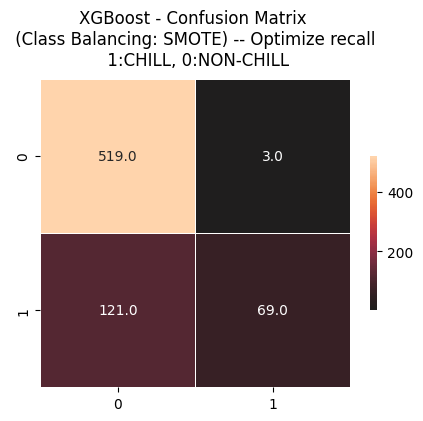

In [ ]:
y_pred = xgb.predict_proba(X_val[fois])
mtx = confusion_matrix(y_val, y_pred[:,1] > 0.5)

plt.figure(figsize=(5,4))
sns.heatmap(mtx, annot=True, center=0, fmt=".1f", linewidths=0.5, cbar_kws={"shrink": 0.5})
plt.title(f"XGBoost - Confusion Matrix \n (Class Balancing: {imblearn_}) -- Optimize {tune} \n 1:CHILL, 0:NON-CHILL", y=1.02)
plt.savefig(f"plots/ConfusionMatrix_XGB_{imblearn_}_{tune}.png", bbox_inches="tight", pad_inches=0.2, dpi=300)

In [ ]:
val_models_performance = save_model_metrics("XGB", "GridSearch", n_folds, tune, imblearn_, [X_train, y_train], [X_val, y_val], grid_xgb, 0.5, val_models_performance)
test_models_performance = save_model_metrics("XGB", "GridSearch", n_folds, tune, imblearn_, [X_train, y_train], [X_test, y_test], grid_xgb, 0.5, test_models_performance)

In [ ]:
test_models_performance

,Model,SearchCV,folds,HyperParams,refit,class-weight,Train-Accuracy,Val-Accuracy,F1-Score,Recall,Precision,ROC_AUC,mthw_corr,geometric_mean,threshold
0,LogReg,GridSearch,5,"{'C': 10.0, 'class_weight': 'balanced', 'penal...",recall,SMOTE,0.634779,0.616632,0.049521,0.627760,0.025777,0.645919,0.062723,0.622080,0.5
1,RandomForest,RandomSearch,5,"{'n_estimators': 250, 'min_samples_split': 466...",recall,SMOTE,0.606620,0.554000,0.054876,0.813880,0.028395,0.779583,0.091364,0.668932,0.5
2,SVC,RandomSearch,5,"{'probability': True, 'max_iter': 5240, 'kerne...",recall,SMOTE,0.953287,0.927883,0.112415,0.287066,0.069892,0.661817,0.114076,0.518978,0.5
3,XGB,GridSearch,5,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti...",recall,SMOTE,0.998415,0.954231,0.306991,0.637224,0.202202,0.913556,0.342060,0.781872,0.5


In [ ]:
val_models_performance

,Model,SearchCV,folds,HyperParams,refit,class-weight,Train-Accuracy,Val-Accuracy,F1-Score,Recall,Precision,ROC_AUC,mthw_corr,geometric_mean,threshold
0,LogReg,GridSearch,5,"{'C': 10.0, 'class_weight': 'balanced', 'penal...",recall,SMOTE,0.634779,0.516854,0.277311,0.347368,0.230769,0.504688,-0.066845,0.448294,0.5
1,RandomForest,RandomSearch,5,"{'n_estimators': 250, 'min_samples_split': 466...",recall,SMOTE,0.606620,0.689607,0.589981,0.836842,0.455587,0.784342,0.418385,0.729551,0.5
2,SVC,RandomSearch,5,"{'probability': True, 'max_iter': 5240, 'kerne...",recall,SMOTE,0.953287,0.747191,0.217391,0.131579,0.625000,0.534271,0.197548,0.357488,0.5
3,XGB,GridSearch,5,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti...",recall,SMOTE,0.998415,0.825843,0.526718,0.363158,0.958333,0.922868,0.524353,0.600892,0.5


## Evaluating Models Performance

#### View Best Model

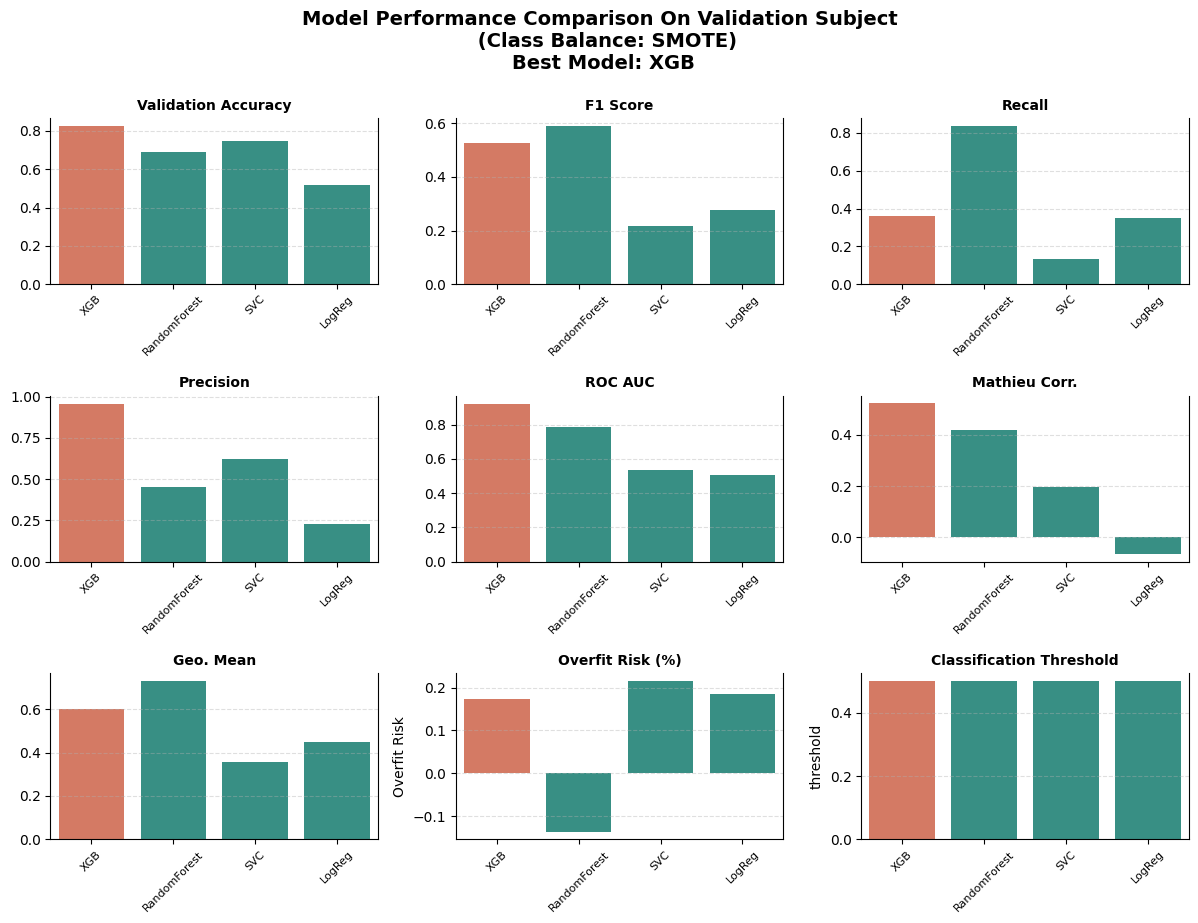

In [ ]:
# @title Model Validation Performance Plots

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the dataframe
df = val_models_performance.copy()

# Compute Overfitting Risk (Train Accuracy - Test Accuracy)
df["Overfit Risk"] = (df["Train-Accuracy"] - df["Val-Accuracy"]) / df["Train-Accuracy"]

# Identify top-performing model
best_model_name = df.loc[df["ROC_AUC"].idxmax(), "Model"]

# Reorder by ROC_AUC
df_sorted = df.sort_values(by="ROC_AUC", ascending=False)

# 🔥 Highlight color map
colors = ["#2a9d8f" if model != best_model_name else "#e76f51" for model in df_sorted["Model"]]

# Metrics to compare
metrics = ["Val-Accuracy", "F1-Score", "Recall", "Precision", "ROC_AUC", "mthw_corr", "geometric_mean"]
plot_titles = ["Validation Accuracy", "F1 Score", "Recall", "Precision", "ROC AUC", "Mathieu Corr.", "Geo. Mean"]

# Plot Setup
fig, axes = plt.subplots(3, 3, figsize=(12,9))
axes = axes.flatten()

# Plot performance metrics
for i, (metric, title) in enumerate(zip(metrics, plot_titles)):
    sns.barplot(x="Model", y=metric, data=df_sorted, palette=colors, ax=axes[i])
    axes[i].set_title(title, fontsize=10, weight="bold")
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].spines["top"].set_visible(False)
    axes[i].grid(axis="y", linestyle="--", alpha=0.4)

# Overfit Risk subplot
sns.barplot(x="Model", y="Overfit Risk", data=df_sorted, palette=colors, ax=axes[len(metrics)])
axes[len(metrics)].set_title("Overfit Risk (%)", fontsize=10, weight="bold")
axes[len(metrics)].tick_params(axis='x', rotation=45, labelsize=8)
axes[len(metrics)].set_xlabel("")
axes[len(metrics)].spines["top"].set_visible(False)
axes[len(metrics)].grid(axis="y", linestyle="--", alpha=0.4)

# Threshold subplot
sns.barplot(x="Model", y="threshold", data=df_sorted, palette=colors, ax=axes[len(metrics)+1])
axes[len(metrics)+1].set_title("Classification Threshold", fontsize=10, weight="bold")
axes[len(metrics)+1].tick_params(axis='x', rotation=45, labelsize=8)
axes[len(metrics)+1].set_xlabel("")
axes[len(metrics)+1].spines["top"].set_visible(False)
axes[len(metrics)+1].grid(axis="y", linestyle="--", alpha=0.4)

# Remove any unused subplots
if len(metrics) + 2 < len(axes):
    for i in range(len(metrics) + 2, len(axes)):
        fig.delaxes(axes[i])

# Main title
fig.suptitle(f"Model Performance Comparison On Validation Subject \n (Class Balance: {imblearn_})\nBest Model: {best_model_name}",
             fontsize=14, weight="bold", y=1.02)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# Save with clear name
filename = f"plots/validation_model_comparison__{imblearn_}__highlight_best.png"
fig.savefig(filename, dpi=300, bbox_inches='tight')

In [ ]:
df.to_csv(f"models_validation_performance_{imblearn_}.csv")
df

,Model,SearchCV,folds,HyperParams,refit,class-weight,Train-Accuracy,Val-Accuracy,F1-Score,Recall,Precision,ROC_AUC,mthw_corr,geometric_mean,threshold,Overfit Risk
0,LogReg,GridSearch,5,"{'C': 10.0, 'class_weight': 'balanced', 'penal...",recall,SMOTE,0.634779,0.516854,0.277311,0.347368,0.230769,0.504688,-0.066845,0.448294,0.5,0.185773
1,RandomForest,RandomSearch,5,"{'n_estimators': 250, 'min_samples_split': 466...",recall,SMOTE,0.606620,0.689607,0.589981,0.836842,0.455587,0.784342,0.418385,0.729551,0.5,-0.136802
2,SVC,RandomSearch,5,"{'probability': True, 'max_iter': 5240, 'kerne...",recall,SMOTE,0.953287,0.747191,0.217391,0.131579,0.625000,0.534271,0.197548,0.357488,0.5,0.216195
3,XGB,GridSearch,5,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti...",recall,SMOTE,0.998415,0.825843,0.526718,0.363158,0.958333,0.922868,0.524353,0.600892,0.5,0.172846


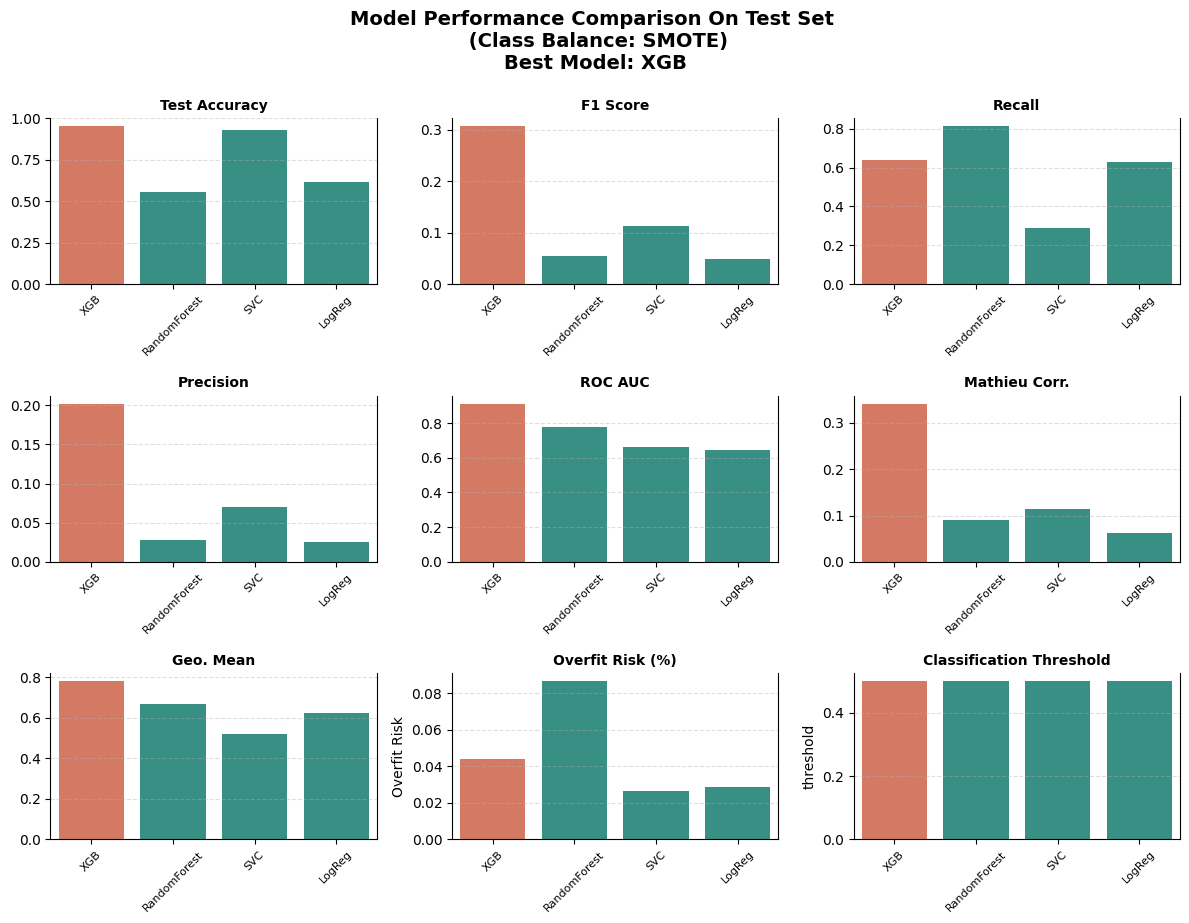

In [ ]:
# @title Model Test-Set Performance Plots

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the dataframe
df = test_models_performance.copy()

# Compute Overfitting Risk (Train Accuracy - Test Accuracy)
df["Overfit Risk"] = (df["Train-Accuracy"] - df["Val-Accuracy"]) / df["Train-Accuracy"]

# Identify top-performing model
best_model_name = df.loc[df["ROC_AUC"].idxmax(), "Model"]

# Reorder by ROC_AUC
df_sorted = df.sort_values(by="ROC_AUC", ascending=False)

# 🔥 Highlight color map
colors = ["#2a9d8f" if model != best_model_name else "#e76f51" for model in df_sorted["Model"]]

# Metrics to compare
metrics = ["Val-Accuracy", "F1-Score", "Recall", "Precision", "ROC_AUC", "mthw_corr", "geometric_mean"]
plot_titles = ["Test Accuracy", "F1 Score", "Recall", "Precision", "ROC AUC", "Mathieu Corr.", "Geo. Mean"]

# Plot Setup
fig, axes = plt.subplots(3, 3, figsize=(12,9))
axes = axes.flatten()

# Plot performance metrics
for i, (metric, title) in enumerate(zip(metrics, plot_titles)):
    sns.barplot(x="Model", y=metric, data=df_sorted, palette=colors, ax=axes[i])
    axes[i].set_title(title, fontsize=10, weight="bold")
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].spines["top"].set_visible(False)
    axes[i].grid(axis="y", linestyle="--", alpha=0.4)

# Overfit Risk subplot
sns.barplot(x="Model", y="Overfit Risk", data=df_sorted, palette=colors, ax=axes[len(metrics)])
axes[len(metrics)].set_title("Overfit Risk (%)", fontsize=10, weight="bold")
axes[len(metrics)].tick_params(axis='x', rotation=45, labelsize=8)
axes[len(metrics)].set_xlabel("")
axes[len(metrics)].spines["top"].set_visible(False)
axes[len(metrics)].grid(axis="y", linestyle="--", alpha=0.4)

# Threshold subplot
sns.barplot(x="Model", y="threshold", data=df_sorted, palette=colors, ax=axes[len(metrics)+1])
axes[len(metrics)+1].set_title("Classification Threshold", fontsize=10, weight="bold")
axes[len(metrics)+1].tick_params(axis='x', rotation=45, labelsize=8)
axes[len(metrics)+1].set_xlabel("")
axes[len(metrics)+1].spines["top"].set_visible(False)
axes[len(metrics)+1].grid(axis="y", linestyle="--", alpha=0.4)

# Remove any unused subplots
if len(metrics) + 2 < len(axes):
    for i in range(len(metrics) + 2, len(axes)):
        fig.delaxes(axes[i])

# Main title
fig.suptitle(f"Model Performance Comparison On Test Set \n (Class Balance: {imblearn_})\nBest Model: {best_model_name}",
             fontsize=14, weight="bold", y=1.02)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# Save with clear name
filename = f"plots/tetst_model_comparison__{imblearn_}__highlight_best.png"
fig.savefig(filename, dpi=300, bbox_inches='tight')

In [ ]:
df.to_csv(f"models_test_set_performance_{imblearn_}.csv")
df

,Model,SearchCV,folds,HyperParams,refit,class-weight,Train-Accuracy,Val-Accuracy,F1-Score,Recall,Precision,ROC_AUC,mthw_corr,geometric_mean,threshold,Overfit Risk
0,LogReg,GridSearch,5,"{'C': 10.0, 'class_weight': 'balanced', 'penal...",recall,SMOTE,0.634779,0.616632,0.049521,0.627760,0.025777,0.645919,0.062723,0.622080,0.5,0.028588
1,RandomForest,RandomSearch,5,"{'n_estimators': 250, 'min_samples_split': 466...",recall,SMOTE,0.606620,0.554000,0.054876,0.813880,0.028395,0.779583,0.091364,0.668932,0.5,0.086743
2,SVC,RandomSearch,5,"{'probability': True, 'max_iter': 5240, 'kerne...",recall,SMOTE,0.953287,0.927883,0.112415,0.287066,0.069892,0.661817,0.114076,0.518978,0.5,0.026648
3,XGB,GridSearch,5,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti...",recall,SMOTE,0.998415,0.954231,0.306991,0.637224,0.202202,0.913556,0.342060,0.781872,0.5,0.044254


#### Offset Performance

In [ ]:
model = xgb
threshold = 0.5
offsets = list(range(-20, -5, 1)) + list(range(0, 21))

In [ ]:
eval_data = pd.concat([organic_df, augmented_df, simulated_df, non_chills_df])
# eval_data = eval_data[eval_data["id"]!=5086]

# for col in log_transform_columns:
#   eval_data["log_"+col] = np.log1p(eval_data[col])

In [ ]:
from sklearn.utils import resample

tof_accs = tim_offset_accuracies = {}
subjects = dataset["id"].unique()
subjects = [int(subject) for subject in subjects]

for tof, TIME_OFFSET in enumerate(offsets):
  for subject in subjects:

    if TIME_OFFSET==-6:
      df = dataset[dataset["id"]==subject]
      X = df[fois]
      y = df["chill"]
      y = y.apply(lambda x: 0 if x == "NON-CHILL" else 1)
    else:
      organic = organic_df[(organic_df["id"]==subject)]
      augmented = augmented_df[(augmented_df["id"]==subject)]
      simulated = simulated_df[(simulated_df["id"]==subject)]
      non_chills = non_chills_df[(non_chills_df["id"]==subject)]
      df = pd.concat([organic, augmented, simulated, non_chills])

      df = df.drop(["CRC_coherence", "RR_RMSSD", "HRV_LF", "RRV_LF"], axis=1)
      df = df.drop(["id", "phase", "epoch", "prior"], axis=1)
      df.loc[df["chill"]=="ORGANIC", "chill"] = "CHILL"
      df.loc[df["chill"]=="AUGMENTED", "chill"] = "CHILL"
      df.loc[df["chill"]=="SIMULATED", "chill"] = "NON-CHILL"

      tdf = df[(df["offset"]==TIME_OFFSET) | (df["offset"]==0)]
      tdf = tdf.drop(["offset"], axis=1)
      y = tdf["chill"]
      y = y.apply(lambda x: 0 if x == "NON-CHILL" else 1)
      if len(y)==0:
        tof_lls[subject].append(0)
        continue
      tdf = tdf[numerical_cols]
      tdf = tdf.fillna(tdf.mean())
      for col in log_transform_columns:
        tdf["log_"+col] = np.log1p(tdf[col])
      X = tdf[fois]

    if subject not in tof_accs:
      tof_accs[subject] = []

    y_pred = model.predict_proba(X[fois])
    y_pred = y_pred[:,1] > threshold
    acc = accuracy_score(y, y_pred)
    tof_accs[subject].append(acc)

tof_accs_arr = np.zeros((len(subjects), len(list(offsets))))
for s, subject in enumerate(subjects):
  tof_accs_arr[s, :] = tof_accs[subject]

In [ ]:
tof_accs_arr = []
for s, subject in enumerate(tof_lls):
  if subject not in tof_accs or len(tof_accs[subject])==0:
    continue
  tof_accs_arr.append(tof_accs[subject])
tof_accs_arr = np.array(tof_accs_arr)

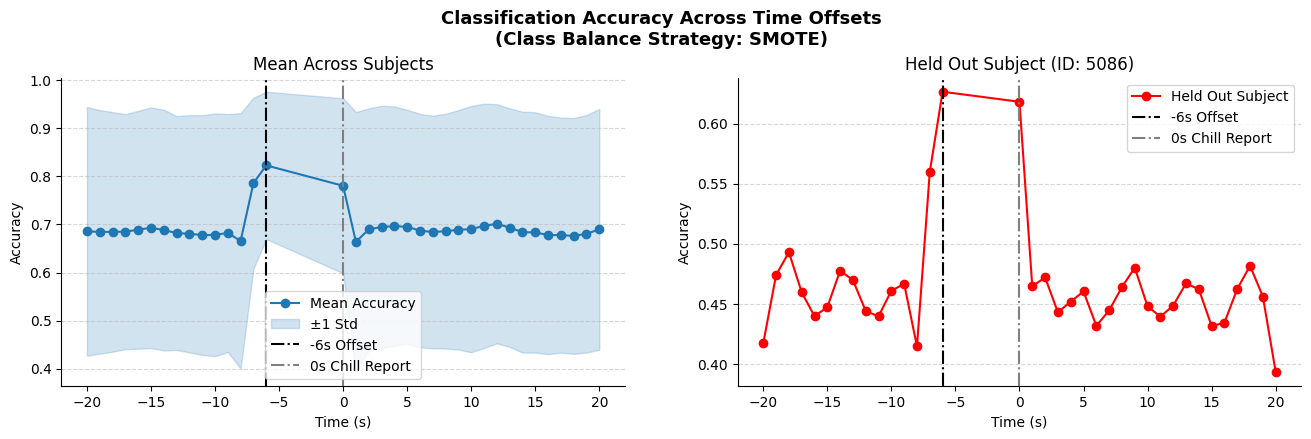

In [ ]:
from scipy.signal import savgol_filter
import numpy as np
import matplotlib.pyplot as plt

# Assuming `offsets`, `tof_accs`, and `tof_accs_arr` are already defined

mean_tof_acc = np.mean(tof_accs_arr, axis=0)
std_tof_acc = np.std(tof_accs_arr, axis=0)

# Apply smoothing
window_size = 5  # Must be odd and <= len(offsets)
poly_order = 2
mean_tof_acc_smooth = savgol_filter(mean_tof_acc, window_length=window_size, polyorder=poly_order)
subject_acc_smooth = savgol_filter(tof_accs[5086], window_length=window_size, polyorder=poly_order)


fig, ax = plt.subplots(1, 2, figsize=(16, 4))

# Right: Held-out subject
ax[1].plot(offsets, subject_acc_smooth, color="red", marker="o", label="Held Out Subject")
ax[1].set_title("Held Out Subject (ID: 5086)")
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Accuracy")
ax[1].axvline(-6, linestyle="-.", color="black", label="-6s Offset")
ax[1].axvline(0, linestyle="-.", color="gray", label="0s Chill Report")

# Left: Mean across subjects
ax[0].plot(offsets, mean_tof_acc_smooth, color="C0", marker="o", label="Mean Accuracy")
# Optionally smooth the std bounds (or comment this out if not needed)
smoothed_upper = savgol_filter(mean_tof_acc + std_tof_acc, window_size, poly_order)
smoothed_lower = savgol_filter(mean_tof_acc - std_tof_acc, window_size, poly_order)
ax[0].fill_between(offsets, smoothed_lower, smoothed_upper, color="C0", alpha=0.2, label="±1 Std")
ax[0].axvline(-6, linestyle="-.", color="black", label="-6s Offset")
ax[0].axvline(0, linestyle="-.", color="gray", label="0s Chill Report")

ax[0].set_title("Mean Across Subjects")
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Accuracy")

# Formatting
fig.suptitle(f"Classification Accuracy Across Time Offsets\n(Class Balance Strategy: {imblearn_})",
             fontsize=13, weight='bold', y=1.05)

for i in range(len(ax)):
    ax[i].grid(axis="y", linestyle="--", alpha=0.5)
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["right"].set_visible(False)
    ax[i].legend()

plt.savefig("plots/accuracy__offset_vs_accuracy__classbal_{}.png".format(imblearn_), dpi=300, bbox_inches='tight')


In [ ]:
val_models_performance

,Model,SearchCV,folds,HyperParams,refit,class-weight,Train-Accuracy,Val-Accuracy,F1-Score,Recall,Precision,ROC_AUC,mthw_corr,geometric_mean,threshold
0,LogReg,GridSearch,5,"{'C': 10.0, 'class_weight': 'balanced', 'penal...",recall,SMOTE,0.634779,0.516854,0.277311,0.347368,0.230769,0.504688,-0.066845,0.448294,0.5
1,RandomForest,RandomSearch,5,"{'n_estimators': 250, 'min_samples_split': 466...",recall,SMOTE,0.606620,0.689607,0.589981,0.836842,0.455587,0.784342,0.418385,0.729551,0.5
2,SVC,RandomSearch,5,"{'probability': True, 'max_iter': 5240, 'kerne...",recall,SMOTE,0.953287,0.747191,0.217391,0.131579,0.625000,0.534271,0.197548,0.357488,0.5
3,XGB,GridSearch,5,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti...",recall,SMOTE,0.998415,0.825843,0.526718,0.363158,0.958333,0.922868,0.524353,0.600892,0.5


In [ ]:
tof_lls = time_offset_likelihoods = {}
subjects = dataset["id"].unique()
subjects = [int(subject) for subject in subjects]

offsets = list(range(-20, -5, 1)) + list(range(0, 21))

for tof, TIME_OFFSET in enumerate(offsets):
  for subject in subjects:
    if TIME_OFFSET==-6:
      df = dataset[dataset["id"]==subject]
      X = df[fois]
      y = df["chill"]
      y = y.apply(lambda x: 0 if x == "NON-CHILL" else 1)
    else:
      organic = organic_df[(organic_df["id"]==subject)]
      augmented = augmented_df[(augmented_df["id"]==subject)]
      simulated = simulated_df[(simulated_df["id"]==subject)]
      non_chills = non_chills_df[(non_chills_df["id"]==subject)]
      df = pd.concat([organic, augmented, simulated, non_chills])

      df = df.drop(["CRC_coherence", "RR_RMSSD", "HRV_LF", "RRV_LF"], axis=1)
      df = df.drop(["id", "phase", "epoch", "prior"], axis=1)
      df.loc[df["chill"]=="ORGANIC", "chill"] = "CHILL"
      df.loc[df["chill"]=="AUGMENTED", "chill"] = "CHILL"
      df.loc[df["chill"]=="SIMULATED", "chill"] = "NON-CHILL"

      tdf = df[(df["offset"]==TIME_OFFSET) | (df["offset"]==0)]
      tdf = tdf.drop(["offset"], axis=1)
      y = tdf["chill"]
      y = y.apply(lambda x: 0 if x == "NON-CHILL" else 1)
      if len(y)==0:
        tof_lls[subject].append(0)
        continue
      tdf = tdf[numerical_cols]
      tdf = tdf.fillna(tdf.mean())
      for col in log_transform_columns:
        tdf["log_"+col] = np.log1p(tdf[col])
      X = tdf[fois]

    if subject not in tof_lls:
      tof_lls[subject] = []

    y_pred = model.predict_proba(X[fois])
    probs = probablities_positive_class = y_pred[:,1] > threshold

    y = np.array(y)
    probs = np.clip(probs, 1E-10, 1 - 1E-10)

    log_ll = log_likelihood = (np.sum(y*np.log(probs) + (1-y)*np.log(1 - probs))) / len(y)
    tof_lls[subject].append(log_ll)

In [ ]:
tof_lls_arr = []
for s, subject in enumerate(tof_lls):
  if subject not in tof_lls or len(tof_lls[subject])==0:
    continue
  tof_lls_arr.append(tof_lls[subject])
tof_lls_arr = np.array(tof_lls_arr)

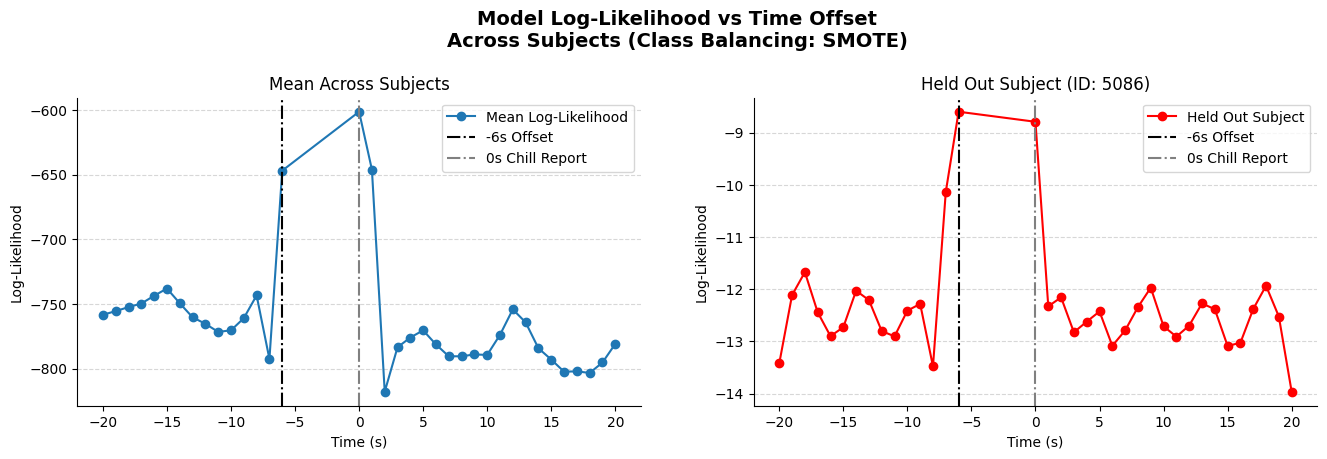

In [ ]:
from scipy.signal import savgol_filter
import numpy as np
import matplotlib.pyplot as plt

offsets = list(range(-20, -5, 1)) + list(range(0, 21))

# Calculate mean and std
mean_tof_ll = np.mean(tof_lls_arr, axis=0)
std_tof_ll = np.std(tof_lls_arr, axis=0)

# Apply smoothing
window_size = 5  # Must be odd and <= len(offsets)
poly_order = 2
mean_tof_ll_smooth = savgol_filter(mean_tof_ll, window_length=window_size, polyorder=poly_order)
subject_ll = np.array(tof_lls[5086])
subject_ll_smooth = savgol_filter(subject_ll, window_length=window_size, polyorder=poly_order)

fig, ax = plt.subplots(1, 2, figsize=(16, 4))

# Right: Held-out subject
ax[1].plot(offsets, subject_ll_smooth, color="red", label="Held Out Subject", marker="o")
ax[1].set_title("Held Out Subject (ID: 5086)")
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Log-Likelihood")
ax[1].axvline(-6, linestyle="-.", color="black", label="-6s Offset")
ax[1].axvline(0, linestyle="-.", color="gray", label="0s Chill Report")

# Left: Mean across subjects
ax[0].plot(offsets, mean_tof_ll_smooth, color="C0", label="Mean Log-Likelihood", marker="o")
ax[0].set_title("Mean Across Subjects")
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Log-Likelihood")
ax[0].axvline(-6, linestyle="-.", color="black", label="-6s Offset")
ax[0].axvline(0, linestyle="-.", color="gray", label="0s Chill Report")

fig.suptitle("Model Log-Likelihood vs Time Offset\nAcross Subjects (Class Balancing: {})".format(imblearn_),
             fontsize=14, weight="bold", y=1.1)

for i in range(len(ax)):
    ax[i].grid(axis="y", linestyle="--", alpha=0.5)
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["right"].set_visible(False)
    ax[i].legend()

plt.savefig("plots/loglikelihood__offset_vs_model_confidence__{}.png".format(imblearn_), dpi=300, bbox_inches='tight')


#### ROC-Curve

In [ ]:
from sklearn.metrics import roc_curve

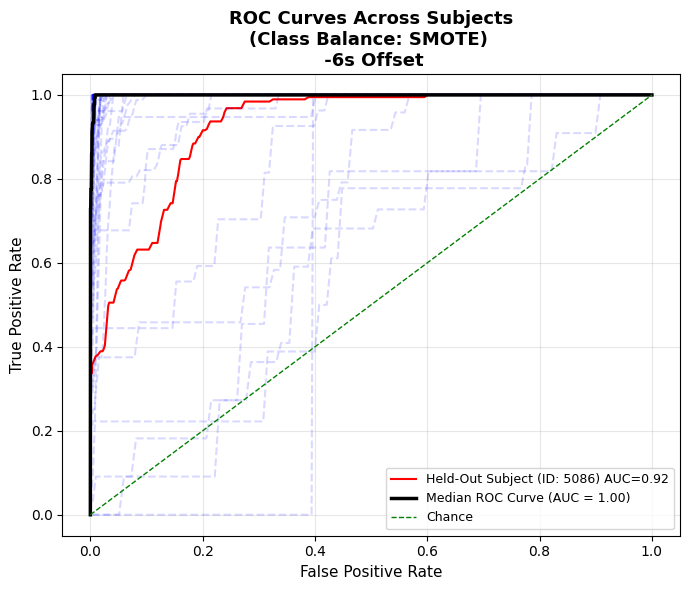

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from scipy.interpolate import CubicSpline

# Containers
tprs = []
aucs = []
_grid = np.linspace(0, 1, 3000)

def smooth_roc_curve(tpr, window_size=5):
    # Apply simple moving average smoothing to TPR
    tpr_smooth = np.convolve(tpr, np.ones(window_size)/window_size, mode='valid')
    return tpr_smooth

subjects = sorted([int(subject) for subject in dataset["id"].unique()])
plt.figure(figsize=(7, 6))

for subject in subjects:

    df = dataset[dataset["id"]==subject]

    if len(df)==0:
      continue
    X = df[fois]
    y = df["chill"].map({"CHILL": 1, "NON-CHILL": 0})
    y_pred = xgb.predict_proba(X[fois])[:, 1]

    fpr, tpr, thresholds = roc_curve(y, y_pred, drop_intermediate=False)
    roc_auc = auc(fpr, tpr)
    # if roc_auc<0.2:
    #   continue

    mask = ~np.isnan(fpr) & ~np.isnan(tpr)
    fpr = fpr[mask]
    tpr = tpr[mask]
    thresholds = thresholds[mask]

    # Interpolate TPR to a fixed grid so we can average later (not smooth, just step values)
    if len(fpr)==0 or len(tpr)==0:
      continue

    aucs.append(roc_auc)

    tpr = np.interp(_grid, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)

    window = int(0.05*len(fpr))
    if window>=3:
      tpr = smooth_roc_curve(tpr, window_size=window if window>=1 else 1)
      smooth_grid = smooth_roc_curve(_grid, window_size=window if window>=1 else 1)
    else:
      smooth_grid = _grid

    if subject==5086:
      plt.plot(smooth_grid, tpr, color="red", label=f"Held-Out Subject (ID: 5086) AUC={roc_auc:.2f}")
    else:
      plt.plot(smooth_grid, tpr, linestyle="--", color="blue", alpha=0.15)

# # === Mean ROC ===
median_tpr = np.median(tprs, axis=0)
std_tpr = np.std(tprs, axis=0)
mean_auc = np.median(aucs)

plt.plot(_grid, median_tpr, color="black", lw=2.5, label=f"Median ROC Curve (AUC = {mean_auc:.2f})")

# === Chance Line ===
plt.plot([0, 1], [0, 1], linestyle="--", lw=1, color="green", label="Chance", alpha=1)

# === Style and Labels ===
plt.xlabel("False Positive Rate", fontsize=11)
plt.ylabel("True Positive Rate", fontsize=11)
plt.title(f"ROC Curves Across Subjects\n(Class Balance: {imblearn_}) \n -6s Offset", fontsize=13, weight="bold")
plt.legend(loc="lower right", fontsize=9)
plt.grid(alpha=0.3)
plt.tight_layout()

# Save
plt.savefig(f"plots/roc_curves__per_subject__{imblearn_}.png", dpi=300)
plt.show()


#### Save Artifacts


In [ ]:
from google.colab import files
import shutil

shutil.make_archive("plots_model_development", 'zip', "plots")
files.download("plots_model_development.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# LSTM

In [ ]:
from IPython.display import clear_output
import time
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
! pip3 install mne
! pip3 install neurokit2
! pip3 install pyxdf
time.sleep(0.1)
clear_output()

print(f" ")

In [ ]:
PLOT_TIME_WINDOW = 30

In [ ]:
import math
import joblib

import numpy as np
import sp as sp

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import DataLoader, Dataset, Subset
from einops import rearrange

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

from sklearn.model_selection import StratifiedShuffleSplit

import scipy.signal as signal
from scipy.signal import resample_poly

import seaborn as sns
from tqdm import tqdm

from imblearn.under_sampling import RandomUnderSampler

%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
extracted_data = {
    "ORGANIC": joblib.load("drive/MyDrive/chills_dataset/processed/organic_chills_signal.sav"),
    "AUGMENTED": joblib.load("drive/MyDrive/chills_dataset/processed/augmented_chills_signal.sav"),
    "SIMULATED": joblib.load("drive/MyDrive/chills_dataset/processed/simulated_chills_signal.sav"),
    "NON": joblib.load("drive/MyDrive/chills_dataset/processed/non_chills_signal.sav"),
}

In [ ]:
offset_performance = {}

In [ ]:
# @title Training Functions and Classes

class LRScheduler:

    def __init__(self, lr, patience, factor=0.7, margin=0.1, n_evals=100):
        self.lr0 = lr
        self.lr = lr
        self.patience = patience
        self.factor = factor
        self.steps =1
        self.counts = 0
        self.best_metric = float("inf")
        self.margin = margin
        self.n_evals = n_evals

    def exponential_lr(self, metric):
        if metric - self.best_metric > self.margin:
            self.counts += 1
            if self.counts >= self.patience:
                self.best_metric = metric
                self.counts = 0
                self.steps += 1
                self.lr = self.lr0*math.exp(-1*self.factor*self.steps)
        elif metric + self.margin < self.best_metric:
            self.best_metric = metric
            self.counts = 0
        return self.lr


class EarlyStopping:

    def __init__(self, patience, margin=0.1):
        self.patience = patience
        self.margin = margin
        self.steps = 0

    def check(self, train_metric, val_metric):
        if abs(train_metric - val_metric) > self.margin:
            self.steps += 1
        else:
            self.steps = 0

        if self.steps >= self.patience:
            return True
        else:
            return False

class CheckpointModel:

    def __init__(self, margin):
        self.margin = margin
        self.best_metric = float("inf")
        self.best_state = None

    def checkpoint(self, metric, model):
        if metric + self.margin < self.best_metric:
            self.best_metric = metric
            self.best_state = model.state_dict()

def accuracy_score(logits, classes):
  probs = F.softmax(logits, dim=-1)
  pred = torch.argmax(probs, dim=-1)
  acc = (pred == classes)
  acc = acc.sum() / len(acc)
  return acc

def init_weights(m):
  if isinstance(m, nn.Linear):
    torch.nn.init.xavier_uniform_(m.weight)
    m.bias.data.fill_(0.01)

class ChillsDataset(Dataset):

  def __init__(self, signals, labels, td=1, fps=500):
    X = []
    labels = list(map(lambda x: 0 if x=="NON-CHILL" else 1, labels))
    for signal_ in signals:
      x = torch.tensor(signal_[:int(td*fps), :])
      X.append(x)
    self.X = torch.stack(X).to(torch.float32)
    self.y = torch.tensor(labels)

    print(self.X.size(), self.y.size())

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]

class ChillsPredictNet(nn.Module):

  def __init__(self, n_channels, n_hidden, n_layers, proj_size, n_classes):
    super(ChillsPredictNet, self).__init__()
    self.n_channels = self.C = n_channels
    self.n_hidden = self.H = n_hidden
    self.n_layers = self.L = n_layers
    self.proj_size = self.P = proj_size
    self.n_classes = n_classes

    self.lstm = nn.LSTM(n_channels, n_hidden, n_layers, proj_size=proj_size, batch_first=True)
    # self.pre_ff_dropout = nn.Dropout(0.05)
    self.ff = nn.Linear(n_layers*proj_size, n_classes)

  def forward(self, x, y=None, device=DEVICE):

    B, T, H_in = x.size()
    h, c = torch.randn(self.L, B, self.P).to(DEVICE), torch.randn(self.L, B, self.H).to(DEVICE)
    x, (hn, cn) = self.lstm(x, (h, c))
    hn = rearrange(hn, "l b h -> b l h")
    B, L, H = hn.size()
    hn = hn.reshape(B, L*H)
    hn = F.leaky_relu(hn)

    # hn = self.pre_ff_dropout(hn)
    logits = F.leaky_relu(self.ff(hn))

    if y is not None:
      loss = F.cross_entropy(logits, y, label_smoothing=0.1)
      acc = accuracy_score(logits, y)
      return logits, loss, acc
    return logits


In [ ]:
# @title Form Time Window Dataset

fs = 500
Td = 1

signals = []
labels = []
for chills_class, label in zip(list(extracted_data.keys())[:-1], ["CHILL", "CHILL", "NON-CHILL"]):
  for subject in extracted_data[chills_class].keys():
    for phase in extracted_data[chills_class][subject].keys():
      data = extracted_data[chills_class][subject][phase]
      for instance in data:
        if "pre" not in instance.keys():
          continue
        signal_ = instance["pre"]
        ecg = (signal_[:, 3])
        resp = signal_[:, 2]
        emg = signal_[:, 1]
        eda = signal_[:, 0]

        fs_ = signal_.shape[0] / PLOT_TIME_WINDOW
        if fs_ != fs:
          up = 2
          down = int((fs_ * up) / fs )
          ecg = resample_poly(ecg, up, down)
          resp = resample_poly(resp, up, down)
          emg = resample_poly(emg, up, down)
          eda = resample_poly(eda, up, down)

        signal_ = np.stack([eda, emg, resp, ecg], axis=1)
        signal_ = signal_[-1*int(Td *fs):, :]

        signals.append(signal_)
        labels.append(label)

for subject in extracted_data["NON"]:
  for phase in extracted_data["NON"][subject].keys():
    for epoch in extracted_data["NON"][subject][phase]:
      if "pre" not in epoch:
        continue
      data = epoch["pre"]
      T, _ = data.shape
      epoch_length = int(Td*fs)
      num_epochs = T // epoch_length
      overlap = int(0.1*epoch_length)
      step_size = epoch_length - overlap

      for i in range(num_epochs):
        s_idx = i*step_size
        e_idx = s_idx + epoch_length
        signal_ = data[s_idx:e_idx, :]
        signals.append(signal_)
        labels.append("NON-CHILL")

In [ ]:
signals = np.array(signals)
labels = np.array(labels)
signals.shape, labels.shape

((1748, 500, 4), (1748,))

In [ ]:
np.unique(labels, return_counts=True)

(array(['CHILL', 'NON-CHILL'], dtype='<U9'), array([828, 920]))

In [ ]:
N, T, C = signals.shape

under_sampler = RandomUnderSampler(sampling_strategy=0.95, random_state=42)
signals, labels = under_sampler.fit_resample(signals.reshape(N, -1), labels)
imblearn_ = "underSample"

N = signals.shape[0]
signals = signals.reshape(N, T, C)
signals.shape, labels.shape

((1699, 500, 4), (1699,))

In [ ]:
np.unique(labels, return_counts=True)

(array(['CHILL', 'NON-CHILL'], dtype='<U9'), array([828, 871]))

In [ ]:
train_batch = 50
test_batch = 32

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(splitter.split(signals, labels))

train = ChillsDataset(signals[train_idx,::], labels[train_idx])
test = ChillsDataset(signals[test_idx,::], labels[test_idx])

train_loader = DataLoader(train, batch_size=train_batch, shuffle=True)
test_loader = DataLoader(test, batch_size=test_batch, shuffle=False)

torch.Size([1359, 500, 4]) torch.Size([1359])
torch.Size([340, 500, 4]) torch.Size([340])


In [ ]:
# @title Train

np.random.seed(42)
torch.manual_seed(422)

import gc
gc.collect()
torch.cuda.empty_cache()

model = ChillsPredictNet(n_channels=4, n_hidden=128, n_layers=2, proj_size=32, n_classes=2)
model = model.apply(init_weights)
model = model.to(DEVICE)

lr_ = 1E-4
momentum_ = 0.9
betas_ = (0.9, 0.99)
# optimizer = optim.SGD(model.parameters(), lr=lr_, momentum=momentum_)
optimizer = optim.Adam(model.parameters(), lr=lr_, betas=betas_)

n_episodes = 4000
eval_inter = 100
n_evals = 3

lr_scheduler = LRScheduler(lr_, patience=5, factor=0.5, margin=0.0001, n_evals=n_episodes//n_eval)
early_stop = EarlyStopping(patience=60, margin=0.05)
chk_pt = CheckpointModel(margin=0.0001)

history = {
    "train_loss": [],
    "train_acc": [],
    "test_loss": [],
    "test_acc": [],
    "iter": [],
    "lr": []
}

for i in tqdm(range(n_episodes)):

  model.train()
  train_loss = 0
  train_acc = 0
  count = 0
  for x, y in train_loader:
    if count>=n_evals:
      count=0
      break
    count += 1
    x, y = x.to(DEVICE), y.to(DEVICE)
    optimizer.zero_grad()
    logits, loss, acc = model(x, y)
    loss.backward()
    # torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Clip gradients
    optimizer.step()
    train_loss += loss.item()
    train_acc += acc.item()
  train_loss /= n_evals
  train_acc /= n_evals

  if i==0 or i==n_episodes-1 or i%eval_inter==0:
    model.eval()
    with torch.no_grad():
      test_loss = 0
      test_acc = 0
      for x, y in test_loader:
        x, y = x.to(DEVICE), y.to(DEVICE)
        logits, loss, acc = model(x, y)
        test_loss += loss.item()
        test_acc += acc.item()
    test_loss /= len(test_loader)
    test_acc /= len(test_loader)

    history["train_loss"].append(train_loss)
    history["train_acc"].append(train_acc)
    history["test_loss"].append(test_loss)
    history["test_acc"].append(test_acc)
    history["iter"].append(i)
    history["lr"].append(lr_)
    print(f"Train Acc: {train_acc:.2f}, TestAcc:{test_acc:.2f}, TrainLoss:{train_loss:.4f}, TestLoss:{test_loss:.4f}, lr:{lr_:.2E}")

    lr_ = lr_scheduler.exponential_lr(test_loss)
    for param_group in optimizer.param_groups:
      param_group["lr"] = lr_

    chk_pt.checkpoint(test_loss, model)

print(f"Best Test Loss: {chk_pt.best_metric}")

  0%|          | 2/4000 [00:00<15:11,  4.39it/s]

Train Acc: 0.47, TestAcc:0.49, TrainLoss:0.6936, TestLoss:0.6936, lr:1.00E-04


  3%|▎         | 102/4000 [00:14<10:23,  6.25it/s]

Train Acc: 0.50, TestAcc:0.51, TrainLoss:0.6927, TestLoss:0.6924, lr:1.00E-04


  5%|▌         | 202/4000 [00:27<10:05,  6.27it/s]

Train Acc: 0.54, TestAcc:0.51, TrainLoss:0.6919, TestLoss:0.6914, lr:1.00E-04


  8%|▊         | 302/4000 [00:40<09:45,  6.32it/s]

Train Acc: 0.55, TestAcc:0.52, TrainLoss:0.6898, TestLoss:0.6906, lr:1.00E-04


 10%|█         | 402/4000 [00:54<09:33,  6.27it/s]

Train Acc: 0.48, TestAcc:0.54, TrainLoss:0.6942, TestLoss:0.6900, lr:1.00E-04


 13%|█▎        | 502/4000 [01:07<09:18,  6.27it/s]

Train Acc: 0.43, TestAcc:0.52, TrainLoss:0.6983, TestLoss:0.6891, lr:1.00E-04


 15%|█▌        | 602/4000 [01:20<09:15,  6.12it/s]

Train Acc: 0.52, TestAcc:0.53, TrainLoss:0.6884, TestLoss:0.6890, lr:1.00E-04


 18%|█▊        | 702/4000 [01:34<08:50,  6.21it/s]

Train Acc: 0.48, TestAcc:0.53, TrainLoss:0.6920, TestLoss:0.6889, lr:1.00E-04


 20%|██        | 802/4000 [01:47<08:31,  6.25it/s]

Train Acc: 0.47, TestAcc:0.53, TrainLoss:0.6877, TestLoss:0.6890, lr:1.00E-04


 23%|██▎       | 902/4000 [02:00<08:14,  6.27it/s]

Train Acc: 0.46, TestAcc:0.55, TrainLoss:0.7023, TestLoss:0.6884, lr:1.00E-04


 25%|██▌       | 1002/4000 [02:14<07:58,  6.26it/s]

Train Acc: 0.50, TestAcc:0.56, TrainLoss:0.6882, TestLoss:0.6886, lr:1.00E-04


 28%|██▊       | 1102/4000 [02:27<09:12,  5.24it/s]

Train Acc: 0.55, TestAcc:0.56, TrainLoss:0.6967, TestLoss:0.6885, lr:1.00E-04


 30%|███       | 1202/4000 [02:41<09:49,  4.75it/s]

Train Acc: 0.52, TestAcc:0.55, TrainLoss:0.6951, TestLoss:0.6875, lr:1.00E-04


 33%|███▎      | 1302/4000 [02:54<10:12,  4.41it/s]

Train Acc: 0.41, TestAcc:0.56, TrainLoss:0.7071, TestLoss:0.6874, lr:1.00E-04


 35%|███▌      | 1402/4000 [03:08<09:52,  4.39it/s]

Train Acc: 0.50, TestAcc:0.57, TrainLoss:0.6870, TestLoss:0.6872, lr:1.00E-04


 38%|███▊      | 1502/4000 [03:22<07:44,  5.38it/s]

Train Acc: 0.51, TestAcc:0.56, TrainLoss:0.6874, TestLoss:0.6873, lr:1.00E-04


 40%|████      | 1602/4000 [03:35<06:45,  5.91it/s]

Train Acc: 0.57, TestAcc:0.57, TrainLoss:0.6877, TestLoss:0.6866, lr:1.00E-04


 43%|████▎     | 1702/4000 [03:49<06:17,  6.08it/s]

Train Acc: 0.67, TestAcc:0.56, TrainLoss:0.6719, TestLoss:0.6870, lr:1.00E-04


 45%|████▌     | 1802/4000 [04:02<06:00,  6.10it/s]

Train Acc: 0.54, TestAcc:0.56, TrainLoss:0.6943, TestLoss:0.6863, lr:1.00E-04


 48%|████▊     | 1902/4000 [04:16<05:37,  6.21it/s]

Train Acc: 0.53, TestAcc:0.57, TrainLoss:0.6864, TestLoss:0.6861, lr:1.00E-04


 50%|█████     | 2002/4000 [04:29<05:22,  6.20it/s]

Train Acc: 0.57, TestAcc:0.58, TrainLoss:0.6820, TestLoss:0.6860, lr:1.00E-04


 53%|█████▎    | 2102/4000 [04:43<05:01,  6.29it/s]

Train Acc: 0.60, TestAcc:0.54, TrainLoss:0.6826, TestLoss:0.6870, lr:1.00E-04


 55%|█████▌    | 2202/4000 [04:56<04:45,  6.30it/s]

Train Acc: 0.63, TestAcc:0.58, TrainLoss:0.6794, TestLoss:0.6851, lr:1.00E-04


 58%|█████▊    | 2302/4000 [05:09<04:31,  6.26it/s]

Train Acc: 0.51, TestAcc:0.58, TrainLoss:0.6871, TestLoss:0.6848, lr:1.00E-04


 60%|██████    | 2402/4000 [05:23<04:19,  6.17it/s]

Train Acc: 0.53, TestAcc:0.58, TrainLoss:0.6905, TestLoss:0.6854, lr:1.00E-04


 63%|██████▎   | 2502/4000 [05:36<04:02,  6.17it/s]

Train Acc: 0.55, TestAcc:0.58, TrainLoss:0.6808, TestLoss:0.6858, lr:1.00E-04


 65%|██████▌   | 2602/4000 [05:49<03:46,  6.17it/s]

Train Acc: 0.59, TestAcc:0.58, TrainLoss:0.6798, TestLoss:0.6869, lr:1.00E-04


 68%|██████▊   | 2702/4000 [06:03<03:27,  6.25it/s]

Train Acc: 0.59, TestAcc:0.56, TrainLoss:0.6863, TestLoss:0.6856, lr:1.00E-04


 70%|███████   | 2802/4000 [06:16<03:09,  6.32it/s]

Train Acc: 0.57, TestAcc:0.55, TrainLoss:0.6892, TestLoss:0.6873, lr:1.00E-04


 73%|███████▎  | 2902/4000 [06:29<02:57,  6.20it/s]

Train Acc: 0.55, TestAcc:0.58, TrainLoss:0.6735, TestLoss:0.6873, lr:3.68E-05


 75%|███████▌  | 3002/4000 [06:43<02:40,  6.22it/s]

Train Acc: 0.55, TestAcc:0.58, TrainLoss:0.6865, TestLoss:0.6889, lr:3.68E-05


 78%|███████▊  | 3102/4000 [06:56<02:22,  6.29it/s]

Train Acc: 0.58, TestAcc:0.57, TrainLoss:0.6713, TestLoss:0.6905, lr:3.68E-05


 80%|████████  | 3202/4000 [07:10<02:09,  6.15it/s]

Train Acc: 0.52, TestAcc:0.56, TrainLoss:0.6908, TestLoss:0.6912, lr:3.68E-05


 83%|████████▎ | 3302/4000 [07:23<02:19,  5.01it/s]

Train Acc: 0.55, TestAcc:0.56, TrainLoss:0.6922, TestLoss:0.6917, lr:3.68E-05


 85%|████████▌ | 3402/4000 [07:37<02:15,  4.40it/s]

Train Acc: 0.54, TestAcc:0.56, TrainLoss:0.6967, TestLoss:0.6912, lr:3.68E-05


 88%|████████▊ | 3502/4000 [07:51<01:53,  4.39it/s]

Train Acc: 0.57, TestAcc:0.57, TrainLoss:0.6893, TestLoss:0.6917, lr:2.23E-05


 90%|█████████ | 3602/4000 [08:05<01:20,  4.94it/s]

Train Acc: 0.58, TestAcc:0.56, TrainLoss:0.6702, TestLoss:0.6919, lr:2.23E-05


 93%|█████████▎| 3702/4000 [08:18<00:49,  6.01it/s]

Train Acc: 0.55, TestAcc:0.57, TrainLoss:0.6848, TestLoss:0.6926, lr:2.23E-05


 95%|█████████▌| 3802/4000 [08:32<00:32,  6.12it/s]

Train Acc: 0.60, TestAcc:0.56, TrainLoss:0.6750, TestLoss:0.6938, lr:2.23E-05


 98%|█████████▊| 3902/4000 [08:45<00:15,  6.16it/s]

Train Acc: 0.54, TestAcc:0.56, TrainLoss:0.6817, TestLoss:0.6923, lr:2.23E-05


100%|██████████| 4000/4000 [08:58<00:00,  7.43it/s]

Train Acc: 0.49, TestAcc:0.55, TrainLoss:0.6877, TestLoss:0.6944, lr:1.35E-05
Best Test Loss: 0.684846347028559


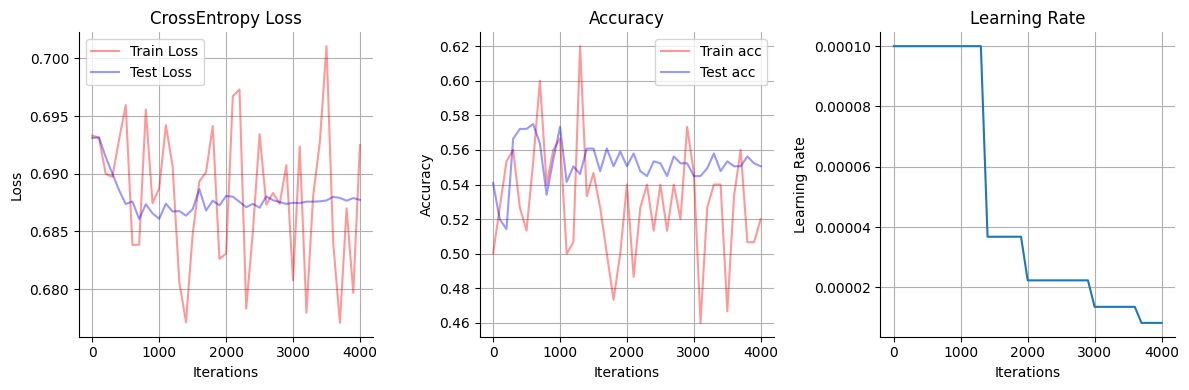

In [ ]:
# @title Plot

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

m_avg = lambda arr, perc: np.convolve(arr, np.ones(int(len(arr) * perc)) / int(len(arr) * perc), mode='valid')
window = 0.1

# Ensure history has data
if "iter" in history and "train_loss" in history and "test_loss" in history:
    if history["iter"] and history["train_loss"] and history["test_loss"]:  # Check non-empty lists
        iter_ = history["iter"]
        # plt.figure()
        # ax[0].plot(iter_, m_avg(history["train_loss"], window), label="Train Loss", color=(1, 0, 0, 0.7))
        # ax[0].plot(iter_, m_avg(history["test_loss"], window), label="Test Loss", color=(0, 0, 1, 0.7))
        ax[0].plot(iter_, history["train_loss"], label="Train Loss", color=(1, 0, 0, 0.4))
        ax[0].plot(iter_, history["test_loss"], label="Test Loss", color=(0, 0, 1, 0.4))
        ax[0].set_xlabel("Iterations")
        ax[0].set_ylabel("Loss")
        # ax[0].axhline(np.log(n_classes.item()), linestyle="dashed", color="red")
        ax[0].legend()
        ax[0].set_title("CrossEntropy Loss")
        ax[0].spines["top"].set_visible(False)
        ax[0].spines["right"].set_visible(False)
        # ax[0].axhline(np.log(2), color=(1,0,0,0.8), linestyle="--")
        # ax[0].axhline(0.2, color=(0,0,0,0.8), linestyle="--")
        ax[0].grid()
        # plt.show()

        ax[1].plot(iter_, history["train_acc"], color=(1, 0, 0, 0.4), label="Train acc")
        ax[1].plot(iter_, history["test_acc"], color=(0, 0, 1, 0.4), label="Test acc")
        ax[1].set_xlabel("Iterations")
        ax[1].set_ylabel("Accuracy")
        # ax[1].axhline(0.8, linestyle="dashed", color="red")
        ax[1].legend()
        ax[1].set_title("Accuracy")
        ax[1].spines["top"].set_visible(False)
        ax[1].spines["right"].set_visible(False)
        ax[1].grid()

        ax[2].plot(iter_, history["lr"], label="Learning Rate")
        ax[2].set_title("Learning Rate")
        ax[2].set_xlabel("Iterations")
        ax[2].set_ylabel("Learning Rate")
        ax[2].spines["top"].set_visible(False)
        ax[2].spines["right"].set_visible(False)
        ax[2].grid()
    else:
        print("History data is empty!")
else:
    print("History keys missing!")

fig.tight_layout()

In [ ]:
print(f"Best Test Loss: {chk_pt.best_metric}")
model.load_state_dict(chk_pt.best_state)
model.eval()
logits = model(test.X.to(DEVICE))
accuracy_score(logits, test.y.to(DEVICE))
offset_performance[str(-1*Td)] = accuracy_score(logits, test.y.to(DEVICE)).item()

Best Test Loss: 0.6896294788880781


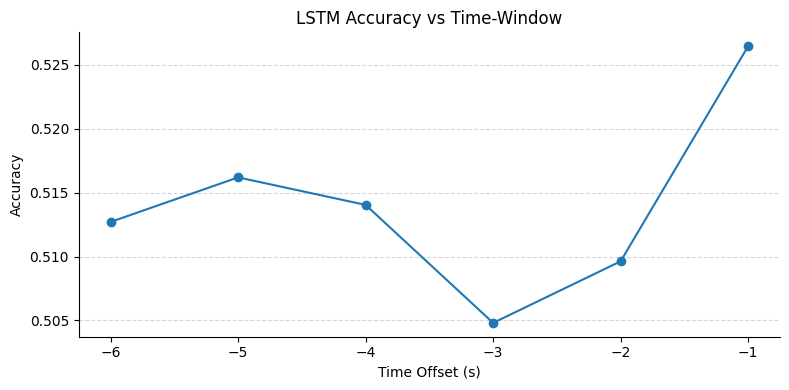

In [ ]:
offsets = sorted([int(k) for k in offset_performance.keys()])
accuracies = [offset_performance[str(k)] for k in offsets]

plt.figure(figsize=(8, 4))
plt.plot(offsets, accuracies, marker='o', linestyle='-', color='C0')
plt.title("LSTM Accuracy vs Time-Window")
plt.xlabel("Time Offset (s)")
plt.ylabel("Accuracy")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(offsets)

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.tight_layout()
plt.savefig("LSTM_performance.png", dpi=300, bbox_inches="tight")
plt.show()